# Obtención de información sobre los montos declarados en automóviles

*Datómicos 2.0, 04/12/2022*

Obtenido a partir de los datos ya filtrados y limpiados.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import json

In [2]:
vehiculos = pd.read_csv('vehiculos.csv')

In [3]:
vehiculos.head()

Unnamed: 0 tipoOperacion                                    titular  \
0           0       AGREGAR  [{'clave': 'DEC', 'valor': 'DECLARANTE'}]   
1           0       AGREGAR  [{'clave': 'DEC', 'valor': 'DECLARANTE'}]   
2           0       AGREGAR  [{'clave': 'DEC', 'valor': 'DECLARANTE'}]   
3           0       AGREGAR  [{'clave': 'DEC', 'valor': 'DECLARANTE'}]   
4           0       AGREGAR  [{'clave': 'DEC', 'valor': 'DECLARANTE'}]   

                                          transmisor       marca  \
0  [{'tipoPersona': 'MORAL', 'nombreRazonSocial':...  VOLKSWAWEN   
1  [{'tipoPersona': 'MORAL', 'nombreRazonSocial':...        BAIC   
2  [{'tipoPersona': 'MORAL', 'nombreRazonSocial':...  VOLKSWAWEN   
3  [{'tipoPersona': 'MORAL', 'nombreRazonSocial':...        BAIC   
4  [{'tipoPersona': 'MORAL', 'nombreRazonSocial':...      NISSAN   

                     modelo  anio formaPago fechaAdquisicion  \
0                      POLO  2017   CRÉDITO       2018-01-16   
1  D20 HATCHBACK FASHION TM  2018   CRÉDITO       2019-05-30   
2                      POLO  2017   CRÉDITO       2018-01-16   
3  D20 HATCHBACK FASHION TM  2018   CRÉDITO       2019-05-30   
4                    XTRAIL  2018   CRÉDITO       2018-03-15   

  tipoVehiculo.clave  ... motivoBaja.valor                  mongo_id  \
0              AUMOT  ...        NO APLICA  63899e66ab09906e956be651   
1              AUMOT  ...        NO APLICA  63899e66ab09906e956be651   
2              AUMOT  ...        NO APLICA  63899e66ab09906e956be64f   
3              AUMOT  ...        NO APLICA  63899e66ab09906e956be64f   
4              AUMOT  ...        NO APLICA  63899e66ab09906e956be713   

  transmisores  numeroSerieRegistro lugarRegistro.pais  \
0          NaN                  NaN                NaN   
1          NaN                  NaN                NaN   
2          NaN                  NaN                NaN   
3          NaN                  NaN                NaN   
4          NaN                  NaN                NaN   

  lugarRegistro.entidadFederativa.clave lugarRegistro.entidadFederativa.valor  \
0                                   NaN                                   NaN   
1                                   NaN                                   NaN   
2                                   NaN                                   NaN   
3                                   NaN                                   NaN   
4                                   NaN                                   NaN   

  tercero formapago aclaracionesObservaciones  
0     NaN       NaN                       NaN  
1     NaN       NaN                       NaN  
2     NaN       NaN                       NaN  
3     NaN       NaN                       NaN  
4     NaN       NaN                       NaN  

[5 rows x 26 columns]

In [4]:
for col in vehiculos.columns:
    print(col)

Unnamed: 0
tipoOperacion
titular
transmisor
marca
modelo
anio
formaPago
fechaAdquisicion
tipoVehiculo.clave
tipoVehiculo.valor
formaAdquisicion.clave
formaAdquisicion.valor
valorAdquisicion.valor
valorAdquisicion.moneda
motivoBaja.clave
motivoBaja.valor
mongo_id
transmisores
numeroSerieRegistro
lugarRegistro.pais
lugarRegistro.entidadFederativa.clave
lugarRegistro.entidadFederativa.valor
tercero
formapago
aclaracionesObservaciones


In [5]:
values = vehiculos.groupby(['mongo_id']).sum()

C:\Users\edmun\AppData\Local\Temp\ipykernel_12968\1177247825.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  values = vehiculos.groupby(['mongo_id']).sum()


In [10]:
values["valorAdquisicion.valor"].shape

(15773,)

In [11]:
vei_vals = values.sort_values(by='valorAdquisicion.valor', ascending=False)

In [15]:
vei_vals = vei_vals.reset_index()

In [16]:
vei_vals = vei_vals[['mongo_id','valorAdquisicion.valor']]

In [17]:
vei_vals

mongo_id  valorAdquisicion.valor
0      6389b8657c4e5f535545e46e             387903000.0
1      638a4025306cb74d0f8cad33             387903000.0
2      638a4025306cb74d0f8ca6d7             337900044.0
3      63899eea451f5e016221a775             334900000.0
4      6389b8657c4e5f53554606b0             297229900.0
...                         ...                     ...
15768  638a421bd0ac15c466117e9d                     0.0
15769  638a421bd0ac15c466117e9b                     0.0
15770  638a421bd0ac15c466117b6d                     0.0
15771  638a53b6befe558d3847ceb7                  -170.0
15772  638a53b6befe558d3847ceb5                  -170.0

[15773 rows x 2 columns]

<Figure size 1080x792 with 0 Axes>

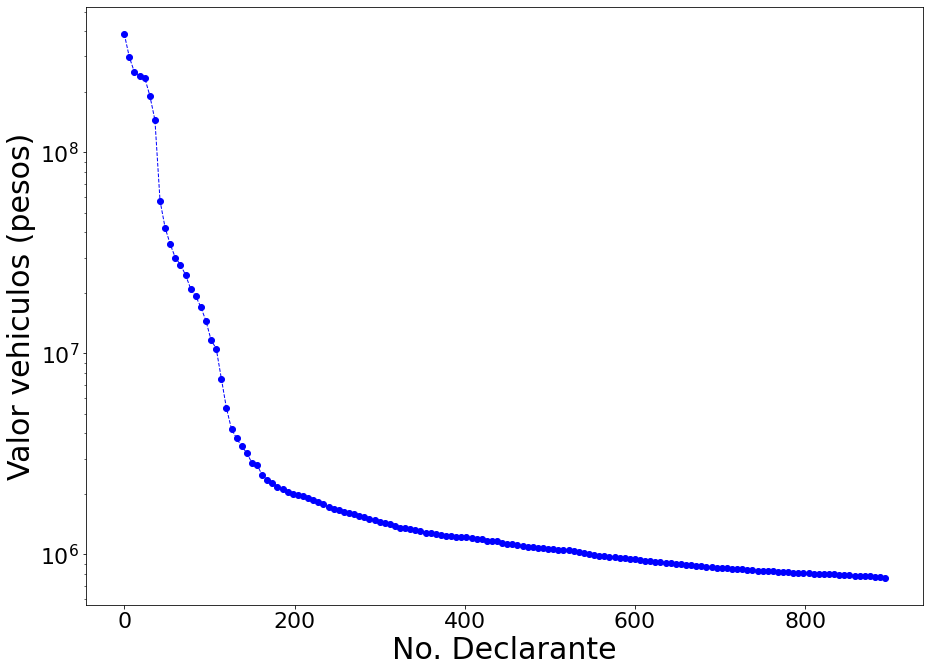

In [19]:
from matplotlib.ticker import MaxNLocator
plt.clf()
plt.rcParams.update({'font.size': 22})

plt.figure()
plt.rcParams['figure.figsize'] = (15,11)

plt.plot(vei_vals["valorAdquisicion.valor"][0:900:6], '--bo',linewidth = 1)

plt.yscale("log")

#plt.ticklabel_format(style= 'plain')

plt.xlabel(r'No. Declarante', size=30)
plt.ylabel(r'Valor vehiculos (pesos)', size=30)
plt.savefig("vehiculos_declarados.png")

In [20]:
#hacer un merge (joint)
declaraciones = pd.read_csv("s1_declaraciones.csv")

C:\Users\edmun\AppData\Local\Temp\ipykernel_12968\1748826870.py:2: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  declaraciones = pd.read_csv("s1_declaraciones.csv")


In [21]:
declaraciones

Unnamed: 0          Nombre  Apellido 1 Apellido 2  \
0                0       ALEJANDRA     AGUILAR       MEZA   
1                1       ALMADELIA       NUNEZ    AGUILAR   
2                2       ALMADELIA       NUNEZ    AGUILAR   
3                3  ANGIEMONSERRAT     ALVAREZ     CASTRO   
4                4          ARLETH  VALENZUELA     ORTEGA   
...            ...             ...         ...        ...   
228038      228038    SINDYOSWALDO       LIMON     MAGANA   
228039      228039          SAMUEL       DURON    PEDROZA   
228040      228040      ROSAIMELDA     PEDROZA    VAZQUEZ   
228041      228041    SERGIOARTURO     MACARIO     VALDES   
228042      228042   NORMAANGELICA     NAVARRO  HERNANDEZ   

                        mongo_id nivel_escolar status_escolaridad  \
0       63899e66ab09906e956be615  BACHILLERATO             TRUNCO   
1       63899e66ab09906e956be61b  BACHILLERATO         FINALIZADO   
2       63899e66ab09906e956be61d  BACHILLERATO         FINALIZADO   
3       63899e66ab09906e956be61f  BACHILLERATO           CURSANDO   
4       63899e66ab09906e956be621  BACHILLERATO             TRUNCO   
...                          ...           ...                ...   
228038  638a53b6befe558d3847e50b           NaN                NaN   
228039  638a53b6befe558d3847e433           NaN                NaN   
228040  638a53b6befe558d3847e3a7           NaN                NaN   
228041  638a53b6befe558d3847e4c1           NaN                NaN   
228042  638a53b6befe558d3847e111           NaN                NaN   

       nivelEmpleoCargoComision  remuneracionMensualCargoPublico  \
0       AUXILIAR ADMINISTRATIVO                           6000.0   
1                       POLICIA                              NaN   
2                       POLICIA                          10786.0   
3              POLICIA AUXILIAR                          11492.0   
4       AUXILIAR ADMINISTRATIVO                           9093.0   
...                         ...                              ...   
228038                   1E0100                              NaN   
228039                   1B0409                              NaN   
228040                   1G0540                              NaN   
228041                   1G0420                              NaN   
228042                OPERATIVO                           9400.0   

       remuneracionMensualCargoPublicoMoneda  otrosIngresosMensualesTotal  \
0                                        MXN                       6000.0   
1                                        NaN                          NaN   
2                                        MXN                      18786.0   
3                                        MXN                      11492.0   
4                                        MXN                       9093.0   
...                                      ...                          ...   
228038                                   NaN                          NaN   
228039                                   NaN                          NaN   
228040                                   NaN                          NaN   
228041                                   NaN                          NaN   
228042                                   MXN                       9400.0   

       otrosIngresosMensualesTotalMoneda  totalIngresosMensualesNetos  \
0                                    MXN                       6000.0   
1                                    NaN                          NaN   
2                                    MXN                      18786.0   
3                                    MXN                      11492.0   
4                                    MXN                       9093.0   
...                                  ...                          ...   
228038                               NaN                          NaN   
228039                               NaN                          NaN   
228040                               NaN       

In [208]:
declaraciones[declaraciones.mongo_id == '6389a0add39bc45687ab147d']

Unnamed: 0 Nombre Apellido 1 Apellido 2                  mongo_id  \
63126       63126   RAUL  MANRIQUEZ     MORENO  6389a0add39bc45687ab147d   

      nivel_escolar status_escolaridad nivelEmpleoCargoComision  \
63126     DOCTORADO         FINALIZADO                DIRECCIÓN   

       remuneracionMensualCargoPublico remuneracionMensualCargoPublicoMoneda  \
63126                              NaN                                   NaN   

       otrosIngresosMensualesTotal otrosIngresosMensualesTotalMoneda  \
63126                          NaN                               NaN   

       totalIngresosMensualesNetos totalIngresosMensualesNetosMoneda  \
63126                          NaN                               NaN   

      BienesInmubeles  ingresoNetoAnualDeclarante          id_servidor  
63126           False                         NaN  RAULMANRIQUEZMORENO

In [22]:
vei_vals = vei_vals.reset_index()

In [23]:
vei_vals

index                  mongo_id  valorAdquisicion.valor
0          0  6389b8657c4e5f535545e46e             387903000.0
1          1  638a4025306cb74d0f8cad33             387903000.0
2          2  638a4025306cb74d0f8ca6d7             337900044.0
3          3  63899eea451f5e016221a775             334900000.0
4          4  6389b8657c4e5f53554606b0             297229900.0
...      ...                       ...                     ...
15768  15768  638a421bd0ac15c466117e9d                     0.0
15769  15769  638a421bd0ac15c466117e9b                     0.0
15770  15770  638a421bd0ac15c466117b6d                     0.0
15771  15771  638a53b6befe558d3847ceb7                  -170.0
15772  15772  638a53b6befe558d3847ceb5                  -170.0

[15773 rows x 3 columns]

In [24]:
Ingresos = declaraciones[['mongo_id','totalIngresosMensualesNetos','ingresoNetoAnualDeclarante']]

In [25]:
Ingresos

mongo_id  totalIngresosMensualesNetos  \
0       63899e66ab09906e956be615                       6000.0   
1       63899e66ab09906e956be61b                          NaN   
2       63899e66ab09906e956be61d                      18786.0   
3       63899e66ab09906e956be61f                      11492.0   
4       63899e66ab09906e956be621                       9093.0   
...                          ...                          ...   
228038  638a53b6befe558d3847e50b                          NaN   
228039  638a53b6befe558d3847e433                          NaN   
228040  638a53b6befe558d3847e3a7                          NaN   
228041  638a53b6befe558d3847e4c1                          NaN   
228042  638a53b6befe558d3847e111                       9400.0   

        ingresoNetoAnualDeclarante  
0                              NaN  
1                              NaN  
2                              NaN  
3                              NaN  
4                              NaN  
...                            ...  
228038                         NaN  
228039                         NaN  
228040                         NaN  
228041                         NaN  
228042                    130289.0  

[228043 rows x 3 columns]

In [26]:
vei_dat = pd.merge(vei_vals,Ingresos,on='mongo_id',how='left')

In [27]:
vei_dat.sort_values(by='valorAdquisicion.valor', ascending=True)[0:50]

index                  mongo_id  valorAdquisicion.valor  \
15772  15772  638a53b6befe558d3847ceb5                  -170.0   
15771  15771  638a53b6befe558d3847ceb7                  -170.0   
15769  15769  638a421bd0ac15c466117e9b                     0.0   
14938  14938  638a421bd0ac15c466118b75                     0.0   
14939  14939  638a421bd0ac15c466118b73                     0.0   
14940  14940  638a421bd0ac15c466118b61                     0.0   
14941  14941  638a421bd0ac15c466118b4b                     0.0   
14942  14942  638a421bd0ac15c466118b5d                     0.0   
14943  14943  638a421bd0ac15c466118b5b                     0.0   
14944  14944  638a421bd0ac15c466118b59                     0.0   
14945  14945  638a421bd0ac15c466118b57                     0.0   
14946  14946  638a421bd0ac15c466118b53                     0.0   
14947  14947  638a421bd0ac15c466118b4f                     0.0   
14948  14948  638a421bd0ac15c466118b09                     0.0   
14949  14949  638a5171030d3fa8097a0d6e                     0.0   
14950  14950  638a421bd0ac15c466118a13                     0.0   
14951  14951  638a421bd0ac15c466118a35                     0.0   
14952  14952  638a421bd0ac15c466118a59                     0.0   
14937  14937  638a421bd0ac15c466118b77                     0.0   
14953  14953  638a421bd0ac15c466118a57                     0.0   
14936  14936  638a421bd0ac15c466118b79                     0.0   
14934  14934  638a421bd0ac15c466118b7d                     0.0   
14919  14919  638a421bd0ac15c466118b2d                     0.0   
14920  14920  638a421bd0ac15c466118b2b                     0.0   
14921  14921  638a421bd0ac15c466118b29                     0.0   
14922  14922  638a421bd0ac15c466118b25                     0.0   
14923  14923  638a421bd0ac15c466118b3d                     0.0   
14924  14924  638a421bd0ac15c466118b21                     0.0   
14925  14925  638a421bd0ac15c466118b1f                     0.0   
14926  14926  638a421bd0ac15c466118b1d                     0.0   
14927  14927  638a421bd0ac15c466118b1b                     0.0   
14928  14928  638a421bd0ac15c466118b17                     0.0   
14929  14929  638a421bd0ac15c466118b11                     0.0   
14930  14930  638a421bd0ac15c466118b3b                     0.0   
14931  14931  638a421bd0ac15c466118b49                     0.0   
14932  14932  638a5171030d3fa8097a0d6c                     0.0   
14933  14933  638a421bd0ac15c466118b63                     0.0   
14935  14935  638a421bd0ac15c466118b7b                     0.0   
14954  14954  638a421bd0ac15c466118a4f                     0.0   
14955  14955  638a421bd0ac15c466118a3f                     0.0   
14956  14956  638a421bd0ac15c466118a3b                     0.0   
14977  14977  638a421bd0ac15c466118a69                     0.0   
14978  14978  638a421bd0ac15c466118a87                     0.0   
14979  14979  638a421bd0ac15c466118a7d                     0.0   
14980  14980  638a421bd0ac15c466118a7b                     0.0   
14981  14981  638a421bd0ac15c466118a73                     0.0   
14982  14982  638a421bd0ac15c466118a71                     0.0   
14983  14983  638a421bd0ac15c466118a6f                     0.0   
14984  14984  638a421bd0ac15c466118b81                     0.0   
14985  14985  638a421bd0ac15c466118b83                     0.0   

       totalIngresosMensualesNetos  ingresoNetoAnualDeclarante  
15772                      24000.0                         NaN  
15771                          NaN                         NaN  
15769                      96500.0                         0.0  
14938                          NaN                         NaN  
14939                          NaN                         NaN  
14940                          NaN                         NaN  
14941                          NaN                         NaN  
14942                          0.0                         0.0  
14943                          NaN                    4

In [36]:
#tenemos la tabla, necesitamos el nombre también
#tenemos vei_vals, con los montos de los autos
Ingresos = declaraciones[['mongo_id','Nombre','Apellido 1','Apellido 2','totalIngresosMensualesNetos','ingresoNetoAnualDeclarante']]
Ingresos

mongo_id          Nombre  Apellido 1 Apellido 2  \
0       63899e66ab09906e956be615       ALEJANDRA     AGUILAR       MEZA   
1       63899e66ab09906e956be61b       ALMADELIA       NUNEZ    AGUILAR   
2       63899e66ab09906e956be61d       ALMADELIA       NUNEZ    AGUILAR   
3       63899e66ab09906e956be61f  ANGIEMONSERRAT     ALVAREZ     CASTRO   
4       63899e66ab09906e956be621          ARLETH  VALENZUELA     ORTEGA   
...                          ...             ...         ...        ...   
228038  638a53b6befe558d3847e50b    SINDYOSWALDO       LIMON     MAGANA   
228039  638a53b6befe558d3847e433          SAMUEL       DURON    PEDROZA   
228040  638a53b6befe558d3847e3a7      ROSAIMELDA     PEDROZA    VAZQUEZ   
228041  638a53b6befe558d3847e4c1    SERGIOARTURO     MACARIO     VALDES   
228042  638a53b6befe558d3847e111   NORMAANGELICA     NAVARRO  HERNANDEZ   

        totalIngresosMensualesNetos  ingresoNetoAnualDeclarante  
0                            6000.0                         NaN  
1                               NaN                         NaN  
2                           18786.0                         NaN  
3                           11492.0                         NaN  
4                            9093.0                         NaN  
...                             ...                         ...  
228038                          NaN                         NaN  
228039                          NaN                         NaN  
228040                          NaN                         NaN  
228041                          NaN                         NaN  
228042                       9400.0                    130289.0  

[228043 rows x 6 columns]

In [37]:
#hacemos el join
vei_dat = pd.merge(vei_vals,Ingresos,on='mongo_id',how='left')
vei_dat

index                  mongo_id  valorAdquisicion.valor       Nombre  \
0          0  6389b8657c4e5f535545e46e             387903000.0     LLANEEVA   
1          1  638a4025306cb74d0f8cad33             387903000.0     LLANEEVA   
2          2  638a4025306cb74d0f8ca6d7             337900044.0  DIANAMAYRET   
3          3  63899eea451f5e016221a775             334900000.0         JOSE   
4          4  6389b8657c4e5f53554606b0             297229900.0      ALFREDO   
...      ...                       ...                     ...          ...   
15768  15768  638a421bd0ac15c466117e9d                     0.0   HUGOMANLIO   
15769  15769  638a421bd0ac15c466117e9b                     0.0   HUGOMANLIO   
15770  15770  638a421bd0ac15c466117b6d                     0.0      BETZABE   
15771  15771  638a53b6befe558d3847ceb7                  -170.0        CESAR   
15772  15772  638a53b6befe558d3847ceb5                  -170.0        CESAR   

      Apellido 1  Apellido 2  totalIngresosMensualesNetos  \
0          RAMOS      FLORES                          NaN   
1          RAMOS      FLORES                          NaN   
2          RAMOS      FLORES                          NaN   
3          PEREZ       GOMEZ                      39900.0   
4       MARTINEZ   ARCHUNDIA                          NaN   
...          ...         ...                          ...   
15768     HUERTA  DIAZDELEON                          NaN   
15769     HUERTA  DIAZDELEON                      96500.0   
15770     FLORES       TERAN                          NaN   
15771     MACIAS      CHAVEZ                          NaN   
15772     MACIAS      CHAVEZ                      24000.0   

       ingresoNetoAnualDeclarante  
0                             NaN  
1                             NaN  
2                             NaN  
3                             0.0  
4                             NaN  
...                           ...  
15768                         NaN  
15769                         0.0  
15770                         NaN  
15771                         NaN  
15772                         NaN  

[15773 rows x 8 columns]

In [30]:
vei_dat.sort_values(by='valorAdquisicion.valor', ascending=False)[0:50]

index                  mongo_id  valorAdquisicion.valor  \
0       0  6389b8657c4e5f535545e46e             387903000.0   
1       1  638a4025306cb74d0f8cad33             387903000.0   
2       2  638a4025306cb74d0f8ca6d7             337900044.0   
3       3  63899eea451f5e016221a775             334900000.0   
4       4  6389b8657c4e5f53554606b0             297229900.0   
6       6  6389b8657c4e5f53554606b4             297229900.0   
5       5  6389b8657c4e5f53554606b2             297229900.0   
7       7  638a4025306cb74d0f8cb59b             297000000.0   
8       8  638a3f3ae69074f2fd5b677b             295990000.0   
9       9  6389b5b06aaa652831e80abb             289000026.0   
10     10  6389b8657c4e5f535546063a             250000000.0   
11     11  6389b8657c4e5f5355460638             250000000.0   
12     12  6389b8657c4e5f5355460636             250000000.0   
13     13  638a4025306cb74d0f8cab6f             250000000.0   
14     14  6389b8657c4e5f5355460634             250000000.0   
15     15  638a4025306cb74d0f8c9fcb             244575900.0   
16     16  638a41fb84bc640c6a7f73f2             244575900.0   
17     17  6389b8657c4e5f535545fda2             244575900.0   
18     18  6389b8657c4e5f53554668a0             240990000.0   
24     24  6389b8657c4e5f535545d946             235000000.0   
23     23  6389b8657c4e5f535545d94a             235000000.0   
22     22  6389b8657c4e5f535545d94c             235000000.0   
21     21  6389b8657c4e5f535545d94e             235000000.0   
20     20  6389b8657c4e5f535545d948             235000000.0   
19     19  638a4025306cb74d0f8caa49             235000000.0   
25     25  6389b5b06aaa652831e795cb             228900000.0   
26     26  638a3f3ae69074f2fd5b8b29             228900000.0   
27     27  6389b8657c4e5f535545f15e             202000000.0   
28     28  638a3f3ae69074f2fd5b8a0d             202000000.0   
29     29  638a4025306cb74d0f8cbaf5             191600008.0   
30     30  6389b8657c4e5f53554618e6             191600008.0   
31     31  638a4025306cb74d0f8c9e29             182100000.0   
32     32  638a41fb84bc640c6a7f7250             182100000.0   
33     33  6389b8657c4e5f5355468cd8             182000000.0   
34     34  6389b8657c4e5f535545f24e             173808070.0   
35     35  638a4025306cb74d0f8cab3d             173808070.0   
36     36  6389b8657c4e5f53554609fe             145000000.0   
37     37  6389b8657c4e5f535545e434             100000000.0   
38     38  63899eea451f5e016220b20d              79589000.0   
39     39  63899eea451f5e0162211e1f              66850000.0   
40     40  6389b8657c4e5f535545ece8              60000000.0   
41     41  638a4025306cb74d0f8cb159              60000000.0   
42     42  63899eea451f5e016220cae3              57500000.0   
43     43  638a53b6befe558d3847c75b              56000000.0   
44     44  638a53b6befe558d3847ae23              45380000.0   
45     45  638a53b6befe558d3847ae25              45380000.0   
46     46  638a4025306cb74d0f8cbf05              44851009.0   
47     47  638a53b6befe558d3847bc69              42145000.0   
48     48  638a53b6befe558d3847bc6b              42145000.0   
49     49  638a4025306cb74d0f8caf89              39277136.0   

               Nombre Apellido 1 Apellido 2  totalIngresosMensualesNetos  \
0            LLANEEVA      RAMOS     FLORES                          NaN   
1            LLANEEVA      RAMOS     FLORES                          NaN   
2         DIANAMAYRET      RAMOS     FLORES                          NaN   
3                JOSE      PEREZ      GOMEZ                      39900.0   
4             ALFREDO   MARTINEZ  ARCHUNDIA                          NaN   
6             ALFREDO   MARTINEZ  ARCHUNDIA                          NaN   
5             ALFREDO   MARTINEZ  ARCHUNDIA                          NaN   
7             ALFREDO   MARTINEZ  ARCHUNDIA                          NaN   
8             ALBERTO    RAMIREZ      DURAN                          NaN   
9          IRVINDARIO     GUZM

In [31]:
''' Sacamos la primera anomalía,
    si valorAdquisicion pasa cierto umbral (lo vamos a poner
    en 10 millones)'''

#vamos a definir el diccionario
anom1_dic = {}
    

In [32]:
vei_dat['totalIngresosMensualesNetos'][1].dtype

dtype('float64')

In [33]:
anom1_list = []
count = 0
for value in vei_dat['valorAdquisicion.valor']:
    anom1_dic = {}
    if value>10000000:
        #print(i)
        anom1_dic = {'mongo_id': vei_dat['mongo_id'][count], 'Nombre': vei_dat['Nombre'][count], 
                    'Apellido 1': vei_dat['Apellido 1'][count],'Apellido 2': vei_dat['Apellido 2'][count],
                    'valorAdquisicion': vei_dat['valorAdquisicion.valor'][count]}
        count +=1
        anom1_list.append(anom1_dic)
print(count)

110


In [73]:
vei_90 = vei_dat['valorAdquisicion.valor'].quantile(q=0.095)
vei_dat

index                  mongo_id  valorAdquisicion.valor       Nombre  \
0          0  6389b8657c4e5f535545e46e             387903000.0     LLANEEVA   
1          1  638a4025306cb74d0f8cad33             387903000.0     LLANEEVA   
2          2  638a4025306cb74d0f8ca6d7             337900044.0  DIANAMAYRET   
3          3  63899eea451f5e016221a775             334900000.0         JOSE   
4          4  6389b8657c4e5f53554606b0             297229900.0      ALFREDO   
...      ...                       ...                     ...          ...   
15768  15768  638a421bd0ac15c466117e9d                     0.0   HUGOMANLIO   
15769  15769  638a421bd0ac15c466117e9b                     0.0   HUGOMANLIO   
15770  15770  638a421bd0ac15c466117b6d                     0.0      BETZABE   
15771  15771  638a53b6befe558d3847ceb7                  -170.0        CESAR   
15772  15772  638a53b6befe558d3847ceb5                  -170.0        CESAR   

      Apellido 1  Apellido 2  totalIngresosMensualesNetos  \
0          RAMOS      FLORES                          NaN   
1          RAMOS      FLORES                          NaN   
2          RAMOS      FLORES                          NaN   
3          PEREZ       GOMEZ                      39900.0   
4       MARTINEZ   ARCHUNDIA                          NaN   
...          ...         ...                          ...   
15768     HUERTA  DIAZDELEON                          NaN   
15769     HUERTA  DIAZDELEON                      96500.0   
15770     FLORES       TERAN                          NaN   
15771     MACIAS      CHAVEZ                          NaN   
15772     MACIAS      CHAVEZ                      24000.0   

       ingresoNetoAnualDeclarante  
0                             NaN  
1                             NaN  
2                             NaN  
3                             0.0  
4                             NaN  
...                           ...  
15768                         NaN  
15769                         0.0  
15770                         NaN  
15771                         NaN  
15772                         NaN  

[15773 rows x 8 columns]

In [98]:
bandera1 = [] #bandera de montos arriba de 1er umbral
bandera2 = [] #bandera de montos debajo de 2do umbral
count = 0
for value in vei_dat['valorAdquisicion.valor']:
    if value>10000000:
        bandera1.append('red')
    elif value<=10000:
        bandera2.append('red')
    else:
        bandera1.append('green')
        bandera2.append('green')


In [103]:
vei_dat['Bandera1'] = np.where((vei_dat['valorAdquisicion.valor']>=1000000),'red','green')

In [105]:
vei_dat['Bandera2'] = np.where((vei_dat['valorAdquisicion.valor']<=10000),'red','green')

In [117]:
vei_dat.rename(columns={'valorAdquisicion.valor': 'valorVehiculos'})

index                  mongo_id  valorVehiculos       Nombre  \
0          0  6389b8657c4e5f535545e46e     387903000.0     LLANEEVA   
1          1  638a4025306cb74d0f8cad33     387903000.0     LLANEEVA   
2          2  638a4025306cb74d0f8ca6d7     337900044.0  DIANAMAYRET   
3          3  63899eea451f5e016221a775     334900000.0         JOSE   
4          4  6389b8657c4e5f53554606b0     297229900.0      ALFREDO   
...      ...                       ...             ...          ...   
15768  15768  638a421bd0ac15c466117e9d             0.0   HUGOMANLIO   
15769  15769  638a421bd0ac15c466117e9b             0.0   HUGOMANLIO   
15770  15770  638a421bd0ac15c466117b6d             0.0      BETZABE   
15771  15771  638a53b6befe558d3847ceb7          -170.0        CESAR   
15772  15772  638a53b6befe558d3847ceb5          -170.0        CESAR   

      Apellido 1  Apellido 2  totalIngresosMensualesNetos  \
0          RAMOS      FLORES                          NaN   
1          RAMOS      FLORES                          NaN   
2          RAMOS      FLORES                          NaN   
3          PEREZ       GOMEZ                      39900.0   
4       MARTINEZ   ARCHUNDIA                          NaN   
...          ...         ...                          ...   
15768     HUERTA  DIAZDELEON                          NaN   
15769     HUERTA  DIAZDELEON                      96500.0   
15770     FLORES       TERAN                          NaN   
15771     MACIAS      CHAVEZ                          NaN   
15772     MACIAS      CHAVEZ                      24000.0   

       ingresoNetoAnualDeclarante Bandera1 Bandera2  
0                             NaN      red    green  
1                             NaN      red    green  
2                             NaN      red    green  
3                             0.0      red    green  
4                             NaN      red    green  
...                           ...      ...      ...  
15768                         NaN    green      red  
15769                         0.0    green      red  
15770                         NaN    green      red  
15771                         NaN    green      red  
15772                         NaN    green      red  

[15773 rows x 10 columns]

In [113]:
import math

#ahora vamos con el dataframe de ingresos
Ingresos['Bandera1'] = np.where((Ingresos['totalIngresosMensualesNetos']).isna(),'red','green')
#math.isnan(Ingresos['totalIngresosMensualesNetos'][1])

C:\Users\edmun\AppData\Local\Temp\ipykernel_12968\2038637295.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ingresos['Bandera1'] = np.where((Ingresos['totalIngresosMensualesNetos']).isna(),'red','green')


In [118]:
Ingresos.rename(columns={'Bandera1': 'Bandera3'})

mongo_id          Nombre  Apellido 1 Apellido 2  \
0       63899e66ab09906e956be615       ALEJANDRA     AGUILAR       MEZA   
1       63899e66ab09906e956be61b       ALMADELIA       NUNEZ    AGUILAR   
2       63899e66ab09906e956be61d       ALMADELIA       NUNEZ    AGUILAR   
3       63899e66ab09906e956be61f  ANGIEMONSERRAT     ALVAREZ     CASTRO   
4       63899e66ab09906e956be621          ARLETH  VALENZUELA     ORTEGA   
...                          ...             ...         ...        ...   
228038  638a53b6befe558d3847e50b    SINDYOSWALDO       LIMON     MAGANA   
228039  638a53b6befe558d3847e433          SAMUEL       DURON    PEDROZA   
228040  638a53b6befe558d3847e3a7      ROSAIMELDA     PEDROZA    VAZQUEZ   
228041  638a53b6befe558d3847e4c1    SERGIOARTURO     MACARIO     VALDES   
228042  638a53b6befe558d3847e111   NORMAANGELICA     NAVARRO  HERNANDEZ   

        totalIngresosMensualesNetos  ingresoNetoAnualDeclarante Bandera3  
0                            6000.0                         NaN    green  
1                               NaN                         NaN      red  
2                           18786.0                         NaN    green  
3                           11492.0                         NaN    green  
4                            9093.0                         NaN    green  
...                             ...                         ...      ...  
228038                          NaN                         NaN      red  
228039                          NaN                         NaN      red  
228040                          NaN                         NaN      red  
228041                          NaN                         NaN      red  
228042                       9400.0                    130289.0    green  

[228043 rows x 7 columns]

In [207]:
Ingresos[Ingresos.mongo_id == '6389a0add39bc45687ab147d']

mongo_id Nombre Apellido 1 Apellido 2  \
63126  6389a0add39bc45687ab147d   RAUL  MANRIQUEZ     MORENO   

       totalIngresosMensualesNetos  ingresoNetoAnualDeclarante Bandera3  
63126                          NaN                         NaN      red

In [95]:
#mongo id, cumple: true, false ; monto declarado: 21802

#descripcion
with open('dictionary.json', 'w') as convert_file:
     convert_file.write(json.dumps(anom1_dic))

In [ ]:
#una vez que ya esté el json
fo

In [38]:
inmuebles_contado = pd.read_csv("anomaly_bienesInmuebles_contado.csv")
inmuebles_credito = pd.read_csv("anomaly_bienesInmuebles_credito.csv")

In [119]:
inmuebles_contado.rename(columns={'Anomaly_level': 'Bandera4'})

Unnamed: 0                  mongo_id  totalIngresosMensualesNetos  \
0            125  63899e66ab09906e956c0023                      45052.0   
1            136  63899e66ab09906e956c000f                      47295.0   
2            400  63899eea451f5e016220b50d                      10330.0   
3            594  63899eea451f5e0162216797                      40000.0   
4            650  63899eea451f5e016221a5c7                      77711.0   
...          ...                       ...                          ...   
2054       16831  638a53b6befe558d3847dd23                    3508142.0   
2055       16832  638a53b6befe558d3847dcf1                      16100.0   
2056       16872  638a53b6befe558d3847e559                      20285.0   
2057       16873  638a53b6befe558d3847e559                      20285.0   
2058       16876  638a53b6befe558d3847e5b9                      18500.0   

      valorAdquisicion.valor formaPago         Nombre  Apellido 1  \
0                  1924000.0   CONTADO         CARLOS         NaN   
1                  1100000.0   CONTADO          CARLA   JONGUITUD   
2                  4000000.0   CONTADO        ELEACIN      TORRES   
3                  1026000.0   CONTADO  DILMANICOLASA     BARRIOS   
4                  1200000.0   CONTADO    MARIAISABEL       SORDO   
...                      ...       ...            ...         ...   
2054                400000.0   CONTADO        MALUISA     RAMIREZ   
2055                 75000.0   CONTADO    MAGUADALUPE    GONZALEZ   
2056                145350.0   CONTADO         UBALDO  DIAZDELEON   
2057                470100.0   CONTADO         UBALDO  DIAZDELEON   
2058                365000.0   CONTADO  VICTORALFONSO    BALTAZAR   

         Apellido 2 Bandera4  
0            AMADOR   yellow  
1     MENDAROZQUETA   yellow  
2         SOLORZANO   yellow  
3           ESCOBAR   yellow  
4          MARTINEZ   yellow  
...             ...      ...  
2054        ESPARZA    green  
2055        ALVAREZ    green  
2056     DIAZDELEON    green  
2057     DIAZDELEON    green  
2058         ROMERO    green  

[2059 rows x 9 columns]

In [123]:
inmuebles_contado.mongo_id.value_counts()

638a502be42143df654c416b    39
638a5171030d3fa8097a1fd2    20
6389a0add39bc45687ab3133    13
6389b8657c4e5f5355465e98    11
6389a0add39bc45687ab47bb    10
                            ..
6389a0add39bc45687aa82e9     1
6389a0add39bc45687aa8467     1
6389a0add39bc45687aa84d7     1
6389a0add39bc45687aa84e5     1
638a53b6befe558d3847e5b9     1
Name: mongo_id, Length: 1346, dtype: int64

In [129]:
inmuebles_contado['sort'] = inmuebles_contado.Anomaly_level.map({'green':1,
                       'yellow':2,
                       'red':3})

In [133]:
inmuebles_contado_u = inmuebles_contado.sort_values('sort').groupby('mongo_id').last().reset_index()

In [136]:
inmuebles_contado_u.rename(columns={'Anomaly_level': 'Bandera4'})

mongo_id  Unnamed: 0  totalIngresosMensualesNetos  \
0     63899e66ab09906e956bf669          35                      38400.0   
1     63899e66ab09906e956bfc37          63                      71000.0   
2     63899e66ab09906e956c000f         136                      47295.0   
3     63899e66ab09906e956c0023         125                      45052.0   
4     63899e66ab09906e956c074f         198                      42000.0   
...                        ...         ...                          ...   
1341  638a53b6befe558d3847d4c7       16813                      13116.0   
1342  638a53b6befe558d3847dcf1       16832                      16100.0   
1343  638a53b6befe558d3847dd23       16831                    3508142.0   
1344  638a53b6befe558d3847e559       16873                      20285.0   
1345  638a53b6befe558d3847e5b9       16876                      18500.0   

      valorAdquisicion.valor formaPago          Nombre  Apellido 1  \
0                     8250.0   CONTADO  ROSALVAARIADNA   GUTIERREZ   
1                   150000.0   CONTADO       RIGOBERTO       GOMEZ   
2                  1100000.0   CONTADO           CARLA   JONGUITUD   
3                  1924000.0   CONTADO          CARLOS        None   
4                    32070.0   CONTADO           JUANA       MEJIA   
...                      ...       ...             ...         ...   
1341                 60000.0   CONTADO     IVANDEJESUS       PEREZ   
1342                 75000.0   CONTADO     MAGUADALUPE    GONZALEZ   
1343                400000.0   CONTADO         MALUISA     RAMIREZ   
1344                470100.0   CONTADO          UBALDO  DIAZDELEON   
1345                365000.0   CONTADO   VICTORALFONSO    BALTAZAR   

         Apellido 2 Bandera4  sort  
0           RAMIREZ    green     1  
1         GUTIERREZ    green     1  
2     MENDAROZQUETA   yellow     2  
3            AMADOR   yellow     2  
4           CARMONA    green     1  
...             ...      ...   ...  
1341       GONZALEZ    green     1  
1342        ALVAREZ    green     1  
1343        ESPARZA    green     1  
1344     DIAZDELEON    green     1  
1345         ROMERO    green     1  

[1346 rows x 10 columns]

In [120]:
inmuebles_credito.rename(columns={'Anomaly_level': 'Bandera5'})

Unnamed: 0                  mongo_id  totalIngresosMensualesNetos  \
0             82  63899e66ab09906e956bfcdb                      61298.0   
1            154  63899e66ab09906e956c033b                      18000.0   
2            170  63899e66ab09906e956c047d                      18000.0   
3            651  63899eea451f5e016221a5c7                      77711.0   
4            763  63899eea451f5e016221a60d                      84213.0   
...          ...                       ...                          ...   
1795       16855  638a53b6befe558d3847e177                      19000.0   
1796       16866  638a53b6befe558d3847e1a3                      18493.0   
1797       16867  638a53b6befe558d3847e1a3                      18493.0   
1798       16868  638a53b6befe558d3847e377                      18400.0   
1799       16877  638a53b6befe558d3847e4b7                      15085.0   

      valorAdquisicion.valor formaPago         Nombre Apellido 1   Apellido 2  \
0                  1600000.0   CRÉDITO  ERNESTOALONSO  RODRIGUEZ      HURTADO   
1                  1092000.0   CRÉDITO   FRANCOADOLFO     CASTRO      ALVAREZ   
2                  1350000.0   CRÉDITO    IRISMINERVA    ENCINAS      VERDUGO   
3                  2150000.0   CRÉDITO    MARIAISABEL      SORDO     MARTINEZ   
4                  2319000.0   CRÉDITO   DAMASOMIRIAN     GARCIA        LOPEZ   
...                      ...       ...            ...        ...          ...   
1795                691000.0   CRÉDITO  ORLANDOULISES  HERNANDEZ        SALAS   
1796                191703.0   CRÉDITO    OSCARMARTIN      LOPEZ  DELOSSANTOS   
1797                874000.0   CRÉDITO    OSCARMARTIN      LOPEZ  DELOSSANTOS   
1798                433900.0   CRÉDITO        ROGELIO     RIVERA      MORALES   
1799                480000.0   CRÉDITO   SERGIOARTURO      LOPEZ       DELUNA   

     Bandera5  
0      yellow  
1      yellow  
2      yellow  
3      yellow  
4      yellow  
...       ...  
1795    green  
1796    green  
1797    green  
1798    green  
1799    green  

[1800 rows x 9 columns]

In [140]:
inmuebles_credito['sort'] = inmuebles_credito.Anomaly_level.map({'green':1,
                       'yellow':2,
                       'red':3})

In [141]:
inmuebles_credito

Unnamed: 0                  mongo_id  totalIngresosMensualesNetos  \
0             82  63899e66ab09906e956bfcdb                      61298.0   
1            154  63899e66ab09906e956c033b                      18000.0   
2            170  63899e66ab09906e956c047d                      18000.0   
3            651  63899eea451f5e016221a5c7                      77711.0   
4            763  63899eea451f5e016221a60d                      84213.0   
...          ...                       ...                          ...   
1795       16855  638a53b6befe558d3847e177                      19000.0   
1796       16866  638a53b6befe558d3847e1a3                      18493.0   
1797       16867  638a53b6befe558d3847e1a3                      18493.0   
1798       16868  638a53b6befe558d3847e377                      18400.0   
1799       16877  638a53b6befe558d3847e4b7                      15085.0   

      valorAdquisicion.valor formaPago         Nombre Apellido 1   Apellido 2  \
0                  1600000.0   CRÉDITO  ERNESTOALONSO  RODRIGUEZ      HURTADO   
1                  1092000.0   CRÉDITO   FRANCOADOLFO     CASTRO      ALVAREZ   
2                  1350000.0   CRÉDITO    IRISMINERVA    ENCINAS      VERDUGO   
3                  2150000.0   CRÉDITO    MARIAISABEL      SORDO     MARTINEZ   
4                  2319000.0   CRÉDITO   DAMASOMIRIAN     GARCIA        LOPEZ   
...                      ...       ...            ...        ...          ...   
1795                691000.0   CRÉDITO  ORLANDOULISES  HERNANDEZ        SALAS   
1796                191703.0   CRÉDITO    OSCARMARTIN      LOPEZ  DELOSSANTOS   
1797                874000.0   CRÉDITO    OSCARMARTIN      LOPEZ  DELOSSANTOS   
1798                433900.0   CRÉDITO        ROGELIO     RIVERA      MORALES   
1799                480000.0   CRÉDITO   SERGIOARTURO      LOPEZ       DELUNA   

     Anomaly_level  sort  
0           yellow     2  
1           yellow     2  
2           yellow     2  
3           yellow     2  
4           yellow     2  
...            ...   ...  
1795         green     1  
1796         green     1  
1797         green     1  
1798         green     1  
1799         green     1  

[1800 rows x 10 columns]

In [142]:
inmuebles_credito_u = inmuebles_credito.sort_values('sort').groupby('mongo_id').last().reset_index()

In [144]:
inmuebles_credito_u.rename(columns={'Anomaly_level': 'Bandera5'})

mongo_id  Unnamed: 0  totalIngresosMensualesNetos  \
0     63899e66ab09906e956be64f           3                      17308.0   
1     63899e66ab09906e956bed9b          16                      53668.0   
2     63899e66ab09906e956bee6b          17                      89706.0   
3     63899e66ab09906e956beedf          22                      29500.0   
4     63899e66ab09906e956bf229          29                      84587.0   
...                        ...         ...                          ...   
1465  638a53b6befe558d3847de45       16843                      18500.0   
1466  638a53b6befe558d3847e177       16855                      19000.0   
1467  638a53b6befe558d3847e1a3       16866                      18493.0   
1468  638a53b6befe558d3847e377       16868                      18400.0   
1469  638a53b6befe558d3847e4b7       16877                      15085.0   

      valorAdquisicion.valor formaPago           Nombre Apellido 1  \
0                    28898.0   CRÉDITO      DULCESARAHI   MARTINEZ   
1                    45396.0   CRÉDITO             IVAN   BAUTISTA   
2                   150000.0   CRÉDITO     JESUSONESIMO   PORTILLO   
3                   436000.0   CRÉDITO     JORGEANTONIO   GUERRERO   
4                    18000.0   CRÉDITO         MATERESA       RUIZ   
...                      ...       ...              ...        ...   
1465                850000.0   CRÉDITO  MARIADELSOCORRO   MELENDEZ   
1466                691000.0   CRÉDITO    ORLANDOULISES  HERNANDEZ   
1467                191703.0   CRÉDITO      OSCARMARTIN      LOPEZ   
1468                433900.0   CRÉDITO          ROGELIO     RIVERA   
1469                480000.0   CRÉDITO     SERGIOARTURO      LOPEZ   

       Apellido 2 Bandera5  sort  
0          MOLINA    green     1  
1           SAENS    green     1  
2          ANGULO    green     1  
3        SICAIROS    green     1  
4            SOTO    green     1  
...           ...      ...   ...  
1465   MAGALLANES    green     1  
1466        SALAS    green     1  
1467  DELOSSANTOS    green     1  
1468      MORALES    green     1  
1469       DELUNA    green     1  

[1470 rows x 10 columns]

In [146]:
vei_dat.mongo_id.value_counts()

6389b8657c4e5f535545e46e    1
638a41fb84bc640c6a7f78fc    1
6389b5b06aaa652831e7cf63    1
638a52db19ee831781be4d48    1
638a52db19ee831781be481a    1
                           ..
6389a0add39bc45687ab4871    1
6389a0add39bc45687aafacb    1
638a43a1f0c6b6baf24da5c7    1
6389a0add39bc45687aabb49    1
638a53b6befe558d3847ceb5    1
Name: mongo_id, Length: 15773, dtype: int64

In [137]:
inmuebles_credito.mongo_id.value_counts()

638a5171030d3fa8097a1fd2    9
6389a0add39bc45687ab26c7    9
638a52db19ee831781be2928    8
6389a0add39bc45687ab24cf    6
6389a0add39bc45687aab3f5    6
                           ..
6389a0add39bc45687aabfc7    1
6389a0add39bc45687aabf47    1
6389a0add39bc45687aabec1    1
6389a0add39bc45687aabf89    1
638a53b6befe558d3847e4b7    1
Name: mongo_id, Length: 1470, dtype: int64

In [122]:
mongos = Ingresos['mongo_id']
mongos

0         63899e66ab09906e956be615
1         63899e66ab09906e956be61b
2         63899e66ab09906e956be61d
3         63899e66ab09906e956be61f
4         63899e66ab09906e956be621
                    ...           
228038    638a53b6befe558d3847e50b
228039    638a53b6befe558d3847e433
228040    638a53b6befe558d3847e3a7
228041    638a53b6befe558d3847e4c1
228042    638a53b6befe558d3847e111
Name: mongo_id, Length: 228043, dtype: object

In [149]:
vei_dat.rename(columns={'valorAdquisicion.valor': 'Valor_auto'},inplace=True)
inmuebles_credito_u.rename(columns={'valorAdquisicion.valor': 'Valor_credito'},inplace=True)
inmuebles_contado_u.rename(columns={'valorAdquisicion.valor': 'Valor_contado'},inplace=True)

In [154]:
inmuebles_credito_u.rename(columns={'Anomaly_level': 'Bandera3'},inplace=True)
inmuebles_contado_u.rename(columns={'Anomaly_level': 'Bandera3'},inplace=True)

In [159]:
Ingresos.rename(columns={'Bandera1': 'Bandera3'},inplace=True)

C:\Users\edmun\AppData\Local\Temp\ipykernel_12968\173816072.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ingresos.rename(columns={'Bandera1': 'Bandera3'},inplace=True)


In [168]:
inmuebles_credito_u

mongo_id  Unnamed: 0  totalIngresosMensualesNetos  \
0     63899e66ab09906e956be64f           3                      17308.0   
1     63899e66ab09906e956bed9b          16                      53668.0   
2     63899e66ab09906e956bee6b          17                      89706.0   
3     63899e66ab09906e956beedf          22                      29500.0   
4     63899e66ab09906e956bf229          29                      84587.0   
...                        ...         ...                          ...   
1465  638a53b6befe558d3847de45       16843                      18500.0   
1466  638a53b6befe558d3847e177       16855                      19000.0   
1467  638a53b6befe558d3847e1a3       16866                      18493.0   
1468  638a53b6befe558d3847e377       16868                      18400.0   
1469  638a53b6befe558d3847e4b7       16877                      15085.0   

      Valor_credito formaPago           Nombre Apellido 1   Apellido 2  \
0           28898.0   CRÉDITO      DULCESARAHI   MARTINEZ       MOLINA   
1           45396.0   CRÉDITO             IVAN   BAUTISTA        SAENS   
2          150000.0   CRÉDITO     JESUSONESIMO   PORTILLO       ANGULO   
3          436000.0   CRÉDITO     JORGEANTONIO   GUERRERO     SICAIROS   
4           18000.0   CRÉDITO         MATERESA       RUIZ         SOTO   
...             ...       ...              ...        ...          ...   
1465       850000.0   CRÉDITO  MARIADELSOCORRO   MELENDEZ   MAGALLANES   
1466       691000.0   CRÉDITO    ORLANDOULISES  HERNANDEZ        SALAS   
1467       191703.0   CRÉDITO      OSCARMARTIN      LOPEZ  DELOSSANTOS   
1468       433900.0   CRÉDITO          ROGELIO     RIVERA      MORALES   
1469       480000.0   CRÉDITO     SERGIOARTURO      LOPEZ       DELUNA   

     Bandera3  sort  
0       green     1  
1       green     1  
2       green     1  
3       green     1  
4       green     1  
...       ...   ...  
1465    green     1  
1466    green     1  
1467    green     1  
1468    green     1  
1469    green     1  

[1470 rows x 10 columns]

In [162]:
flags_1 = pd.merge(Ingresos,vei_dat[['mongo_id','Valor_auto','Bandera1','Bandera2']],on='mongo_id',how='left')

In [169]:
inmuebles_credito_u.rename(columns={'Bandera3': 'Bandera4'},inplace=True)
inmuebles_contado_u.rename(columns={'Bandera3': 'Bandera4'},inplace=True)

In [170]:
inmuebles_contado_u.rename(columns={'Bandera4': 'Bandera5'},inplace=True)

In [173]:
inmuebles_credito_u

mongo_id  Unnamed: 0  totalIngresosMensualesNetos  \
0     63899e66ab09906e956be64f           3                      17308.0   
1     63899e66ab09906e956bed9b          16                      53668.0   
2     63899e66ab09906e956bee6b          17                      89706.0   
3     63899e66ab09906e956beedf          22                      29500.0   
4     63899e66ab09906e956bf229          29                      84587.0   
...                        ...         ...                          ...   
1465  638a53b6befe558d3847de45       16843                      18500.0   
1466  638a53b6befe558d3847e177       16855                      19000.0   
1467  638a53b6befe558d3847e1a3       16866                      18493.0   
1468  638a53b6befe558d3847e377       16868                      18400.0   
1469  638a53b6befe558d3847e4b7       16877                      15085.0   

      Valor_credito formaPago           Nombre Apellido 1   Apellido 2  \
0           28898.0   CRÉDITO      DULCESARAHI   MARTINEZ       MOLINA   
1           45396.0   CRÉDITO             IVAN   BAUTISTA        SAENS   
2          150000.0   CRÉDITO     JESUSONESIMO   PORTILLO       ANGULO   
3          436000.0   CRÉDITO     JORGEANTONIO   GUERRERO     SICAIROS   
4           18000.0   CRÉDITO         MATERESA       RUIZ         SOTO   
...             ...       ...              ...        ...          ...   
1465       850000.0   CRÉDITO  MARIADELSOCORRO   MELENDEZ   MAGALLANES   
1466       691000.0   CRÉDITO    ORLANDOULISES  HERNANDEZ        SALAS   
1467       191703.0   CRÉDITO      OSCARMARTIN      LOPEZ  DELOSSANTOS   
1468       433900.0   CRÉDITO          ROGELIO     RIVERA      MORALES   
1469       480000.0   CRÉDITO     SERGIOARTURO      LOPEZ       DELUNA   

     Bandera4  sort  
0       green     1  
1       green     1  
2       green     1  
3       green     1  
4       green     1  
...       ...   ...  
1465    green     1  
1466    green     1  
1467    green     1  
1468    green     1  
1469    green     1  

[1470 rows x 10 columns]

In [175]:
flags_2 = pd.merge(flags_1,inmuebles_credito_u[['mongo_id','Valor_credito','Bandera4']],on='mongo_id',how='left')

In [176]:
flags_3

mongo_id          Nombre  Apellido 1 Apellido 2  \
0       63899e66ab09906e956be615       ALEJANDRA     AGUILAR       MEZA   
1       63899e66ab09906e956be61b       ALMADELIA       NUNEZ    AGUILAR   
2       63899e66ab09906e956be61d       ALMADELIA       NUNEZ    AGUILAR   
3       63899e66ab09906e956be61f  ANGIEMONSERRAT     ALVAREZ     CASTRO   
4       63899e66ab09906e956be621          ARLETH  VALENZUELA     ORTEGA   
...                          ...             ...         ...        ...   
228038  638a53b6befe558d3847e50b    SINDYOSWALDO       LIMON     MAGANA   
228039  638a53b6befe558d3847e433          SAMUEL       DURON    PEDROZA   
228040  638a53b6befe558d3847e3a7      ROSAIMELDA     PEDROZA    VAZQUEZ   
228041  638a53b6befe558d3847e4c1    SERGIOARTURO     MACARIO     VALDES   
228042  638a53b6befe558d3847e111   NORMAANGELICA     NAVARRO  HERNANDEZ   

        totalIngresosMensualesNetos  ingresoNetoAnualDeclarante Bandera3  \
0                            6000.0                         NaN    green   
1                               NaN                         NaN      red   
2                           18786.0                         NaN    green   
3                           11492.0                         NaN    green   
4                            9093.0                         NaN    green   
...                             ...                         ...      ...   
228038                          NaN                         NaN      red   
228039                          NaN                         NaN      red   
228040                          NaN                         NaN      red   
228041                          NaN                         NaN      red   
228042                       9400.0                    130289.0    green   

        Valor_auto Bandera1 Bandera2  Valor_credito Bandera4  
0              NaN      NaN      NaN            NaN      NaN  
1              NaN      NaN      NaN            NaN      NaN  
2              NaN      NaN      NaN            NaN      NaN  
3              NaN      NaN      NaN            NaN      NaN  
4              NaN      NaN      NaN            NaN      NaN  
...            ...      ...      ...            ...      ...  
228038         NaN      NaN      NaN            NaN      NaN  
228039         NaN      NaN      NaN            NaN      NaN  
228040         NaN      NaN      NaN            NaN      NaN  
228041         NaN      NaN      NaN            NaN      NaN  
228042         NaN      NaN      NaN            NaN      NaN  

[228043 rows x 12 columns]

In [179]:
inmuebles_contado_u

mongo_id  Unnamed: 0  totalIngresosMensualesNetos  \
0     63899e66ab09906e956bf669          35                      38400.0   
1     63899e66ab09906e956bfc37          63                      71000.0   
2     63899e66ab09906e956c000f         136                      47295.0   
3     63899e66ab09906e956c0023         125                      45052.0   
4     63899e66ab09906e956c074f         198                      42000.0   
...                        ...         ...                          ...   
1341  638a53b6befe558d3847d4c7       16813                      13116.0   
1342  638a53b6befe558d3847dcf1       16832                      16100.0   
1343  638a53b6befe558d3847dd23       16831                    3508142.0   
1344  638a53b6befe558d3847e559       16873                      20285.0   
1345  638a53b6befe558d3847e5b9       16876                      18500.0   

      Valor_contado formaPago          Nombre  Apellido 1     Apellido 2  \
0            8250.0   CONTADO  ROSALVAARIADNA   GUTIERREZ        RAMIREZ   
1          150000.0   CONTADO       RIGOBERTO       GOMEZ      GUTIERREZ   
2         1100000.0   CONTADO           CARLA   JONGUITUD  MENDAROZQUETA   
3         1924000.0   CONTADO          CARLOS        None         AMADOR   
4           32070.0   CONTADO           JUANA       MEJIA        CARMONA   
...             ...       ...             ...         ...            ...   
1341        60000.0   CONTADO     IVANDEJESUS       PEREZ       GONZALEZ   
1342        75000.0   CONTADO     MAGUADALUPE    GONZALEZ        ALVAREZ   
1343       400000.0   CONTADO         MALUISA     RAMIREZ        ESPARZA   
1344       470100.0   CONTADO          UBALDO  DIAZDELEON     DIAZDELEON   
1345       365000.0   CONTADO   VICTORALFONSO    BALTAZAR         ROMERO   

     Bandera5  sort  
0       green     1  
1       green     1  
2      yellow     2  
3      yellow     2  
4       green     1  
...       ...   ...  
1341    green     1  
1342    green     1  
1343    green     1  
1344    green     1  
1345    green     1  

[1346 rows x 10 columns]

In [193]:
flags_3 = pd.merge(flags_2,inmuebles_contado_u[['mongo_id','Valor_contado','Bandera5']],on='mongo_id',how='left')

In [194]:
flags_3

mongo_id          Nombre  Apellido 1 Apellido 2  \
0       63899e66ab09906e956be615       ALEJANDRA     AGUILAR       MEZA   
1       63899e66ab09906e956be61b       ALMADELIA       NUNEZ    AGUILAR   
2       63899e66ab09906e956be61d       ALMADELIA       NUNEZ    AGUILAR   
3       63899e66ab09906e956be61f  ANGIEMONSERRAT     ALVAREZ     CASTRO   
4       63899e66ab09906e956be621          ARLETH  VALENZUELA     ORTEGA   
...                          ...             ...         ...        ...   
228038  638a53b6befe558d3847e50b    SINDYOSWALDO       LIMON     MAGANA   
228039  638a53b6befe558d3847e433          SAMUEL       DURON    PEDROZA   
228040  638a53b6befe558d3847e3a7      ROSAIMELDA     PEDROZA    VAZQUEZ   
228041  638a53b6befe558d3847e4c1    SERGIOARTURO     MACARIO     VALDES   
228042  638a53b6befe558d3847e111   NORMAANGELICA     NAVARRO  HERNANDEZ   

        totalIngresosMensualesNetos  ingresoNetoAnualDeclarante Bandera3  \
0                            6000.0                         NaN    green   
1                               NaN                         NaN      red   
2                           18786.0                         NaN    green   
3                           11492.0                         NaN    green   
4                            9093.0                         NaN    green   
...                             ...                         ...      ...   
228038                          NaN                         NaN      red   
228039                          NaN                         NaN      red   
228040                          NaN                         NaN      red   
228041                          NaN                         NaN      red   
228042                       9400.0                    130289.0    green   

        Valor_auto Bandera1 Bandera2  Valor_credito Bandera4  Valor_contado  \
0              NaN      NaN      NaN            NaN      NaN            NaN   
1              NaN      NaN      NaN            NaN      NaN            NaN   
2              NaN      NaN      NaN            NaN      NaN            NaN   
3              NaN      NaN      NaN            NaN      NaN            NaN   
4              NaN      NaN      NaN            NaN      NaN            NaN   
...            ...      ...      ...            ...      ...            ...   
228038         NaN      NaN      NaN            NaN      NaN            NaN   
228039         NaN      NaN      NaN            NaN      NaN            NaN   
228040         NaN      NaN      NaN            NaN      NaN            NaN   
228041         NaN      NaN      NaN            NaN      NaN            NaN   
228042         NaN      NaN      NaN            NaN      NaN            NaN   

       Bandera5  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN  
...         ...  
228038      NaN  
228039      NaN  
228040      NaN  
228041      NaN  
228042      NaN  

[228043 rows x 14 columns]

In [195]:
flags_3.Bandera2 = flags_3.Bandera2.fillna('white')

In [192]:
flags_2

mongo_id          Nombre  Apellido 1 Apellido 2  \
0       63899e66ab09906e956be615       ALEJANDRA     AGUILAR       MEZA   
1       63899e66ab09906e956be61b       ALMADELIA       NUNEZ    AGUILAR   
2       63899e66ab09906e956be61d       ALMADELIA       NUNEZ    AGUILAR   
3       63899e66ab09906e956be61f  ANGIEMONSERRAT     ALVAREZ     CASTRO   
4       63899e66ab09906e956be621          ARLETH  VALENZUELA     ORTEGA   
...                          ...             ...         ...        ...   
228038  638a53b6befe558d3847e50b    SINDYOSWALDO       LIMON     MAGANA   
228039  638a53b6befe558d3847e433          SAMUEL       DURON    PEDROZA   
228040  638a53b6befe558d3847e3a7      ROSAIMELDA     PEDROZA    VAZQUEZ   
228041  638a53b6befe558d3847e4c1    SERGIOARTURO     MACARIO     VALDES   
228042  638a53b6befe558d3847e111   NORMAANGELICA     NAVARRO  HERNANDEZ   

        totalIngresosMensualesNetos  ingresoNetoAnualDeclarante Bandera3  \
0                            6000.0                         NaN    green   
1                               NaN                         NaN      red   
2                           18786.0                         NaN    green   
3                           11492.0                         NaN    green   
4                            9093.0                         NaN    green   
...                             ...                         ...      ...   
228038                          NaN                         NaN      red   
228039                          NaN                         NaN      red   
228040                          NaN                         NaN      red   
228041                          NaN                         NaN      red   
228042                       9400.0                    130289.0    green   

        Valor_auto Bandera1 Bandera2  Valor_credito Bandera4  
0              NaN      NaN      NaN            NaN      NaN  
1              NaN      NaN      NaN            NaN      NaN  
2              NaN      NaN      NaN            NaN      NaN  
3              NaN      NaN      NaN            NaN      NaN  
4              NaN      NaN      NaN            NaN      NaN  
...            ...      ...      ...            ...      ...  
228038         NaN      NaN      NaN            NaN      NaN  
228039         NaN      NaN      NaN            NaN      NaN  
228040         NaN      NaN      NaN            NaN      NaN  
228041         NaN      NaN      NaN            NaN      NaN  
228042         NaN      NaN      NaN            NaN      NaN  

[228043 rows x 12 columns]

In [196]:
flags_3.Bandera1 = flags_3.Bandera1.fillna('white')
flags_3.Bandera4 = flags_3.Bandera4.fillna('white')
flags_3.Bandera5 = flags_3.Bandera5.fillna('white')

In [197]:
flags_3

mongo_id          Nombre  Apellido 1 Apellido 2  \
0       63899e66ab09906e956be615       ALEJANDRA     AGUILAR       MEZA   
1       63899e66ab09906e956be61b       ALMADELIA       NUNEZ    AGUILAR   
2       63899e66ab09906e956be61d       ALMADELIA       NUNEZ    AGUILAR   
3       63899e66ab09906e956be61f  ANGIEMONSERRAT     ALVAREZ     CASTRO   
4       63899e66ab09906e956be621          ARLETH  VALENZUELA     ORTEGA   
...                          ...             ...         ...        ...   
228038  638a53b6befe558d3847e50b    SINDYOSWALDO       LIMON     MAGANA   
228039  638a53b6befe558d3847e433          SAMUEL       DURON    PEDROZA   
228040  638a53b6befe558d3847e3a7      ROSAIMELDA     PEDROZA    VAZQUEZ   
228041  638a53b6befe558d3847e4c1    SERGIOARTURO     MACARIO     VALDES   
228042  638a53b6befe558d3847e111   NORMAANGELICA     NAVARRO  HERNANDEZ   

        totalIngresosMensualesNetos  ingresoNetoAnualDeclarante Bandera3  \
0                            6000.0                         NaN    green   
1                               NaN                         NaN      red   
2                           18786.0                         NaN    green   
3                           11492.0                         NaN    green   
4                            9093.0                         NaN    green   
...                             ...                         ...      ...   
228038                          NaN                         NaN      red   
228039                          NaN                         NaN      red   
228040                          NaN                         NaN      red   
228041                          NaN                         NaN      red   
228042                       9400.0                    130289.0    green   

        Valor_auto Bandera1 Bandera2  Valor_credito Bandera4  Valor_contado  \
0              NaN    white    white            NaN    white            NaN   
1              NaN    white    white            NaN    white            NaN   
2              NaN    white    white            NaN    white            NaN   
3              NaN    white    white            NaN    white            NaN   
4              NaN    white    white            NaN    white            NaN   
...            ...      ...      ...            ...      ...            ...   
228038         NaN    white    white            NaN    white            NaN   
228039         NaN    white    white            NaN    white            NaN   
228040         NaN    white    white            NaN    white            NaN   
228041         NaN    white    white            NaN    white            NaN   
228042         NaN    white    white            NaN    white            NaN   

       Bandera5  
0         white  
1         white  
2         white  
3         white  
4         white  
...         ...  
228038    white  
228039    white  
228040    white  
228041    white  
228042    white  

[228043 rows x 14 columns]

In [198]:
flags_3.rename(columns={'Bandera3': 'Bandera0'},inplace=True)
flags_3.rename(columns={'Bandera2': 'Bandera02'},inplace=True)
flags_3.rename(columns={'Bandera1': 'Bandera01'},inplace=True)

In [206]:
flags_3[flags_3.mongo_id == '6389a0add39bc45687ab147d']

mongo_id Nombre Apellido 1 Apellido 2  \
63126  6389a0add39bc45687ab147d   RAUL  MANRIQUEZ     MORENO   

       totalIngresosMensualesNetos  ingresoNetoAnualDeclarante Bandera1  \
63126                          NaN                         NaN      red   

       Valor_auto Bandera2 Bandera3  Valor_credito Bandera4  Valor_contado  \
63126    615000.0    green    green            NaN    white            NaN   

      Bandera5  
63126    white

In [200]:
flags_3.rename(columns={'Bandera0': 'Bandera1'},inplace=True)
flags_3.rename(columns={'Bandera02': 'Bandera3'},inplace=True)
flags_3.rename(columns={'Bandera01': 'Bandera2'},inplace=True)

In [201]:
flags_3

mongo_id          Nombre  Apellido 1 Apellido 2  \
0       63899e66ab09906e956be615       ALEJANDRA     AGUILAR       MEZA   
1       63899e66ab09906e956be61b       ALMADELIA       NUNEZ    AGUILAR   
2       63899e66ab09906e956be61d       ALMADELIA       NUNEZ    AGUILAR   
3       63899e66ab09906e956be61f  ANGIEMONSERRAT     ALVAREZ     CASTRO   
4       63899e66ab09906e956be621          ARLETH  VALENZUELA     ORTEGA   
...                          ...             ...         ...        ...   
228038  638a53b6befe558d3847e50b    SINDYOSWALDO       LIMON     MAGANA   
228039  638a53b6befe558d3847e433          SAMUEL       DURON    PEDROZA   
228040  638a53b6befe558d3847e3a7      ROSAIMELDA     PEDROZA    VAZQUEZ   
228041  638a53b6befe558d3847e4c1    SERGIOARTURO     MACARIO     VALDES   
228042  638a53b6befe558d3847e111   NORMAANGELICA     NAVARRO  HERNANDEZ   

        totalIngresosMensualesNetos  ingresoNetoAnualDeclarante Bandera1  \
0                            6000.0                         NaN    green   
1                               NaN                         NaN      red   
2                           18786.0                         NaN    green   
3                           11492.0                         NaN    green   
4                            9093.0                         NaN    green   
...                             ...                         ...      ...   
228038                          NaN                         NaN      red   
228039                          NaN                         NaN      red   
228040                          NaN                         NaN      red   
228041                          NaN                         NaN      red   
228042                       9400.0                    130289.0    green   

        Valor_auto Bandera2 Bandera3  Valor_credito Bandera4  Valor_contado  \
0              NaN    white    white            NaN    white            NaN   
1              NaN    white    white            NaN    white            NaN   
2              NaN    white    white            NaN    white            NaN   
3              NaN    white    white            NaN    white            NaN   
4              NaN    white    white            NaN    white            NaN   
...            ...      ...      ...            ...      ...            ...   
228038         NaN    white    white            NaN    white            NaN   
228039         NaN    white    white            NaN    white            NaN   
228040         NaN    white    white            NaN    white            NaN   
228041         NaN    white    white            NaN    white            NaN   
228042         NaN    white    white            NaN    white            NaN   

       Bandera5  
0         white  
1         white  
2         white  
3         white  
4         white  
...         ...  
228038    white  
228039    white  
228040    white  
228041    white  
228042    white  

[228043 rows x 14 columns]

In [202]:
flags_3.to_csv("banderas.csv")
with open('dictionary.json', 'w') as convert_file:
     convert_file.write(json.dumps(anom1_dic))

In [ ]:
prin((flags_3[]))

In [203]:
count = 0
for Id in flags_3.mongo_id:
    dic = {}
    dic = {'mongo_id': Id, 'Nombre':}



63899e66ab09906e956be615
63899e66ab09906e956be61b
63899e66ab09906e956be61d
63899e66ab09906e956be61f
63899e66ab09906e956be621
63899e66ab09906e956be623
63899e66ab09906e956be627
63899e66ab09906e956be619
63899e66ab09906e956be62b
63899e66ab09906e956be617
63899e66ab09906e956be62d
63899e66ab09906e956be633
63899e66ab09906e956be62f
63899e66ab09906e956be631
63899e66ab09906e956be637
63899e66ab09906e956be635
63899e66ab09906e956be639
63899e66ab09906e956be63b
63899e66ab09906e956be63d
63899e66ab09906e956be63f
63899e66ab09906e956be641
63899e66ab09906e956be643
63899e66ab09906e956be645
63899e66ab09906e956be625
63899e66ab09906e956be649
63899e66ab09906e956be64b
63899e66ab09906e956be64d
63899e66ab09906e956be629
63899e66ab09906e956be653
63899e66ab09906e956be651
63899e66ab09906e956be655
63899e66ab09906e956be657
63899e66ab09906e956be659
63899e66ab09906e956be65b
63899e66ab09906e956be65d
63899e66ab09906e956be65f
63899e66ab09906e956be661
63899e66ab09906e956be663
63899e66ab09906e956be665
63899e66ab09906e956be667


63899e66ab09906e956bf793
63899e66ab09906e956bf795
63899e66ab09906e956bf761
63899e66ab09906e956bf797
63899e66ab09906e956bf76f
63899e66ab09906e956bf799
63899e66ab09906e956bf7a1
63899e66ab09906e956bf79b
63899e66ab09906e956bf787
63899e66ab09906e956bf74f
63899e66ab09906e956bf79d
63899e66ab09906e956bf629
63899e66ab09906e956bf79f
63899e66ab09906e956bf7a3
63899e66ab09906e956bf7a5
63899e66ab09906e956bf7a7
63899e66ab09906e956bf7a9
63899e66ab09906e956bf7ab
63899e66ab09906e956bf7b1
63899e66ab09906e956bf7b3
63899e66ab09906e956bf7ad
63899e66ab09906e956bf7af
63899e66ab09906e956bf7bb
63899e66ab09906e956bf7b7
63899e66ab09906e956bf7bd
63899e66ab09906e956bf7b9
63899e66ab09906e956bf78d
63899e66ab09906e956bf7b5
63899e66ab09906e956bf7c5
63899e66ab09906e956bf7c1
63899e66ab09906e956bf7c7
63899e66ab09906e956bf7bf
63899e66ab09906e956bf7c9
63899e66ab09906e956bf7cb
63899e66ab09906e956bf791
63899e66ab09906e956bf7d3
63899e66ab09906e956bf7d1
63899e66ab09906e956bf7cf
63899e66ab09906e956bf5b3
63899e66ab09906e956bf74d


63899e66ab09906e956c0fa7
63899e66ab09906e956c0fe7
63899e66ab09906e956c0f89
63899e66ab09906e956c0fad
63899e66ab09906e956c0feb
63899e66ab09906e956c0fe9
63899e66ab09906e956c0fbf
63899e66ab09906e956c0fed
63899e66ab09906e956c0fef
63899e66ab09906e956c0fc9
63899e66ab09906e956c0fcb
63899e66ab09906e956c034f
63899e66ab09906e956c0fb3
63899e66ab09906e956c0fcf
63899e66ab09906e956c0f43
63899e66ab09906e956c0eaf
63899e66ab09906e956c0f37
63899e66ab09906e956c0ff1
63899e66ab09906e956c0f91
63899e66ab09906e956c0f2f
63899e66ab09906e956c0fc1
63899e66ab09906e956c0e0f
63899e66ab09906e956c0ff7
63899e66ab09906e956c0ff9
63899e66ab09906e956c0ffb
63899e66ab09906e956c0ffd
63899e66ab09906e956c0f9f
63899e66ab09906e956c0f93
63899e66ab09906e956c0fff
63899e66ab09906e956c1001
63899e66ab09906e956c1005
63899e66ab09906e956c1003
63899e66ab09906e956c0ed9
63899e66ab09906e956c0fd3
63899e66ab09906e956c1007
63899e66ab09906e956c100b
63899e66ab09906e956c100d
63899e66ab09906e956c1015
63899e66ab09906e956c1017
63899e66ab09906e956c0fdd


63899e66ab09906e956c244d
63899e66ab09906e956c22c5
63899e66ab09906e956c244f
63899e66ab09906e956c23a5
63899e66ab09906e956c232d
63899e66ab09906e956c23ed
63899e66ab09906e956c23e3
63899e66ab09906e956c2421
63899e66ab09906e956c23d1
63899e66ab09906e956c23cb
63899e66ab09906e956c2427
63899e66ab09906e956c23b7
63899e66ab09906e956c2339
63899e66ab09906e956c23d3
63899e66ab09906e956c2329
63899e66ab09906e956c23ad
63899e66ab09906e956c23af
63899e66ab09906e956c23b9
63899e66ab09906e956c23b1
63899e66ab09906e956c23ab
63899e66ab09906e956c2433
63899e66ab09906e956c23fd
63899e66ab09906e956c2401
63899e66ab09906e956c243d
63899e66ab09906e956c2453
63899e66ab09906e956c2459
63899e66ab09906e956c245b
63899e66ab09906e956c245d
63899e66ab09906e956c245f
63899e66ab09906e956c2461
63899e66ab09906e956c2467
63899e66ab09906e956c24a7
63899e66ab09906e956c24ab
63899e66ab09906e956c23d7
63899e66ab09906e956c2341
63899e66ab09906e956c24ad
63899e66ab09906e956c24b3
63899e66ab09906e956c24b9
63899e66ab09906e956c24db
63899e66ab09906e956c24dd


63899eea451f5e016220a68d
63899eea451f5e016220a68f
63899eea451f5e016220a691
63899eea451f5e016220a695
63899eea451f5e016220a697
63899eea451f5e016220a69b
63899eea451f5e016220a699
63899eea451f5e016220a69d
63899eea451f5e016220a69f
63899eea451f5e016220a693
63899eea451f5e016220a6a1
63899eea451f5e016220a6a3
63899eea451f5e016220a65d
63899eea451f5e016220a6a7
63899eea451f5e016220a6a9
63899eea451f5e016220a6ab
63899eea451f5e016220a6af
63899eea451f5e016220a6ad
63899eea451f5e016220a6b1
63899eea451f5e016220a6b3
63899eea451f5e016220a6b7
63899eea451f5e016220a6b9
63899eea451f5e016220a6bb
63899eea451f5e016220a6b5
63899eea451f5e016220a6bd
63899eea451f5e016220a6c1
63899eea451f5e016220a675
63899eea451f5e016220a6c5
63899eea451f5e016220a6c7
63899eea451f5e016220a6c9
63899eea451f5e016220a6cb
63899eea451f5e016220a6bf
63899eea451f5e016220a6d1
63899eea451f5e016220a6d7
63899eea451f5e016220a6d5
63899eea451f5e016220a6d3
63899eea451f5e016220a6d9
63899eea451f5e016220a6cd
63899eea451f5e016220a6cf
63899eea451f5e016220a6df


63899eea451f5e016220be4b
63899eea451f5e016220be4d
63899eea451f5e016220be47
63899eea451f5e016220be43
63899eea451f5e016220be4f
63899eea451f5e016220be51
63899eea451f5e016220be2f
63899eea451f5e016220be53
63899eea451f5e016220be55
63899eea451f5e016220be57
63899eea451f5e016220bd35
63899eea451f5e016220bdff
63899eea451f5e016220bd4b
63899eea451f5e016220be59
63899eea451f5e016220be11
63899eea451f5e016220be5b
63899eea451f5e016220be5f
63899eea451f5e016220be1d
63899eea451f5e016220be63
63899eea451f5e016220be3d
63899eea451f5e016220be45
63899eea451f5e016220be49
63899eea451f5e016220bdf3
63899eea451f5e016220be75
63899eea451f5e016220be77
63899eea451f5e016220be7f
63899eea451f5e016220be81
63899eea451f5e016220be7d
63899eea451f5e016220bd85
63899eea451f5e016220be83
63899eea451f5e016220bdef
63899eea451f5e016220be85
63899eea451f5e016220be89
63899eea451f5e016220be79
63899eea451f5e016220be87
63899eea451f5e016220be7b
63899eea451f5e016220be8d
63899eea451f5e016220be91
63899eea451f5e016220be5d
63899eea451f5e016220be1b


63899eea451f5e016220d477
63899eea451f5e016220d49f
63899eea451f5e016220d433
63899eea451f5e016220d4a5
63899eea451f5e016220d437
63899eea451f5e016220d4a9
63899eea451f5e016220d485
63899eea451f5e016220d43f
63899eea451f5e016220d44f
63899eea451f5e016220d48d
63899eea451f5e016220d4b1
63899eea451f5e016220d4b3
63899eea451f5e016220d4b7
63899eea451f5e016220d4b9
63899eea451f5e016220d4bb
63899eea451f5e016220d499
63899eea451f5e016220d4bd
63899eea451f5e016220d4bf
63899eea451f5e016220d2b7
63899eea451f5e016220d4c3
63899eea451f5e016220d45b
63899eea451f5e016220d39d
63899eea451f5e016220d49d
63899eea451f5e016220d4d1
63899eea451f5e016220d4d3
63899eea451f5e016220d445
63899eea451f5e016220d4ad
63899eea451f5e016220d2df
63899eea451f5e016220d469
63899eea451f5e016220d3f3
63899eea451f5e016220d46b
63899eea451f5e016220d4b5
63899eea451f5e016220d4d5
63899eea451f5e016220d4d7
63899eea451f5e016220d4db
63899eea451f5e016220d4dd
63899eea451f5e016220d4df
63899eea451f5e016220d4e1
63899eea451f5e016220d431
63899eea451f5e016220d471


63899eea451f5e016220ec29
63899eea451f5e016220ec4f
63899eea451f5e016220ec51
63899eea451f5e016220ec2f
63899eea451f5e016220eb7d
63899eea451f5e016220ec53
63899eea451f5e016220ec55
63899eea451f5e016220ec57
63899eea451f5e016220ec39
63899eea451f5e016220ec59
63899eea451f5e016220eb4d
63899eea451f5e016220ec5d
63899eea451f5e016220ebe5
63899eea451f5e016220ec63
63899eea451f5e016220ec69
63899eea451f5e016220ebf5
63899eea451f5e016220eb19
63899eea451f5e016220ec49
63899eea451f5e016220ec73
63899eea451f5e016220ec37
63899eea451f5e016220ea25
63899eea451f5e016220ec71
63899eea451f5e016220eb0f
63899eea451f5e016220ec79
63899eea451f5e016220ec7b
63899eea451f5e016220eb5d
63899eea451f5e016220ec07
63899eea451f5e016220ebcd
63899eea451f5e016220ec81
63899eea451f5e016220ec7f
63899eea451f5e016220e867
63899eea451f5e016220ec83
63899eea451f5e016220ec87
63899eea451f5e016220eb7f
63899eea451f5e016220ebef
63899eea451f5e016220ec61
63899eea451f5e016220ea0f
63899eea451f5e016220ec5b
63899eea451f5e016220e9c3
63899eea451f5e016220ec65


63899eea451f5e016220fdf9
63899eea451f5e016221019f
63899eea451f5e01622101a3
63899eea451f5e016221012b
63899eea451f5e0162210087
63899eea451f5e016220ff1d
63899eea451f5e016220fda3
63899eea451f5e01622101b3
63899eea451f5e0162210185
63899eea451f5e016220fdb3
63899eea451f5e016221007b
63899eea451f5e0162210181
63899eea451f5e01622101bb
63899eea451f5e0162210145
63899eea451f5e0162210191
63899eea451f5e01622101c9
63899eea451f5e016221012f
63899eea451f5e0162210149
63899eea451f5e0162210173
63899eea451f5e01622101cd
63899eea451f5e01622101cf
63899eea451f5e01622101d1
63899eea451f5e01622101d3
63899eea451f5e016221009f
63899eea451f5e01622101df
63899eea451f5e0162210035
63899eea451f5e01622100c3
63899eea451f5e016221014d
63899eea451f5e0162210163
63899eea451f5e0162210157
63899eea451f5e01622101a5
63899eea451f5e01622101b5
63899eea451f5e01622101b7
63899eea451f5e01622101b9
63899eea451f5e01622101e1
63899eea451f5e01622101e5
63899eea451f5e01622101e7
63899eea451f5e01622101ed
63899eea451f5e01622101f3
63899eea451f5e01622101f5


63899eea451f5e0162211731
63899eea451f5e016221169b
63899eea451f5e0162211633
63899eea451f5e016221170b
63899eea451f5e01622116cf
63899eea451f5e016221170f
63899eea451f5e0162211735
63899eea451f5e0162211711
63899eea451f5e0162211737
63899eea451f5e016221174f
63899eea451f5e0162211715
63899eea451f5e016221171b
63899eea451f5e0162211721
63899eea451f5e016221171d
63899eea451f5e01622116f7
63899eea451f5e0162211611
63899eea451f5e016221172b
63899eea451f5e016221175d
63899eea451f5e0162211283
63899eea451f5e01622116d3
63899eea451f5e0162211763
63899eea451f5e0162211641
63899eea451f5e0162211707
63899eea451f5e0162211705
63899eea451f5e01622116df
63899eea451f5e0162211713
63899eea451f5e016221173b
63899eea451f5e01622116dd
63899eea451f5e016221174b
63899eea451f5e016221176f
63899eea451f5e0162211771
63899eea451f5e01622115c1
63899eea451f5e016221174d
63899eea451f5e0162211773
63899eea451f5e0162211723
63899eea451f5e01622116c5
63899eea451f5e0162211775
63899eea451f5e01622115ff
63899eea451f5e016221163f
63899eea451f5e0162211755


63899eea451f5e0162212b09
63899eea451f5e0162212b9b
63899eea451f5e0162212bc9
63899eea451f5e0162212b9d
63899eea451f5e0162212a99
63899eea451f5e0162212b4f
63899eea451f5e0162212ba5
63899eea451f5e0162212aff
63899eea451f5e0162212a9d
63899eea451f5e0162212bd7
63899eea451f5e0162212bb3
63899eea451f5e0162212be9
63899eea451f5e0162212be7
63899eea451f5e0162212bb5
63899eea451f5e01622129b7
63899eea451f5e0162212887
63899eea451f5e0162212b87
63899eea451f5e0162212b8f
63899eea451f5e0162212bb7
63899eea451f5e0162212bb9
63899eea451f5e0162212bef
63899eea451f5e0162212b89
63899eea451f5e0162212a77
63899eea451f5e0162212bbd
63899eea451f5e0162212bbf
63899eea451f5e0162212bf3
63899eea451f5e0162212bf7
63899eea451f5e0162212bc3
63899eea451f5e0162212b95
63899eea451f5e0162212b05
63899eea451f5e0162212b49
63899eea451f5e0162212a33
63899eea451f5e0162212c07
63899eea451f5e0162212b07
63899eea451f5e0162212bdd
63899eea451f5e0162212b9f
63899eea451f5e0162212bdb
63899eea451f5e0162212c0b
63899eea451f5e0162212b55
63899eea451f5e0162212b1f


63899eea451f5e0162213fd5
63899eea451f5e0162213ef7
63899eea451f5e0162213efd
63899eea451f5e0162213f93
63899eea451f5e0162213f8d
63899eea451f5e0162213fdb
63899eea451f5e0162214003
63899eea451f5e0162214005
63899eea451f5e0162213f17
63899eea451f5e0162214007
63899eea451f5e0162214009
63899eea451f5e0162213fe5
63899eea451f5e016221400b
63899eea451f5e0162213fed
63899eea451f5e0162213f0f
63899eea451f5e0162213ff5
63899eea451f5e0162213f1f
63899eea451f5e0162213ff9
63899eea451f5e0162213ffb
63899eea451f5e0162213fad
63899eea451f5e0162213cc3
63899eea451f5e0162214001
63899eea451f5e0162214025
63899eea451f5e0162214027
63899eea451f5e0162213f43
63899eea451f5e0162213ff1
63899eea451f5e0162213f67
63899eea451f5e016221402f
63899eea451f5e0162214031
63899eea451f5e0162213f51
63899eea451f5e016221400d
63899eea451f5e0162213f7b
63899eea451f5e0162213ff3
63899eea451f5e0162213fc7
63899eea451f5e0162213fd3
63899eea451f5e0162213fcb
63899eea451f5e0162213fb5
63899eea451f5e016221401b
63899eea451f5e0162213f09
63899eea451f5e0162213b7f


63899eea451f5e01622152b7
63899eea451f5e01622152c3
63899eea451f5e0162215389
63899eea451f5e016221538d
63899eea451f5e0162215367
63899eea451f5e016221538b
63899eea451f5e016221536f
63899eea451f5e0162215371
63899eea451f5e0162215399
63899eea451f5e0162215369
63899eea451f5e016221539b
63899eea451f5e0162215355
63899eea451f5e0162215269
63899eea451f5e01622153a1
63899eea451f5e0162215377
63899eea451f5e01622152fb
63899eea451f5e01622153a3
63899eea451f5e016221537f
63899eea451f5e016221537d
63899eea451f5e0162215381
63899eea451f5e0162215379
63899eea451f5e0162215385
63899eea451f5e01622152b9
63899eea451f5e01622153a5
63899eea451f5e01622153a9
63899eea451f5e01622151b9
63899eea451f5e0162215153
63899eea451f5e01622152c1
63899eea451f5e01622153b1
63899eea451f5e0162215387
63899eea451f5e01622153b7
63899eea451f5e01622153b5
63899eea451f5e0162215395
63899eea451f5e016221536d
63899eea451f5e01622152f3
63899eea451f5e016221530b
63899eea451f5e01622153cb
63899eea451f5e01622153cf
63899eea451f5e01622153d1
63899eea451f5e01622153d5


63899eea451f5e0162216a45
63899eea451f5e0162216b51
63899eea451f5e0162216b33
63899eea451f5e0162216b55
63899eea451f5e0162216b59
63899eea451f5e0162216b5d
63899eea451f5e0162216b5f
63899eea451f5e0162216ab5
63899eea451f5e0162216aad
63899eea451f5e0162216aeb
63899eea451f5e0162216a09
63899eea451f5e0162216b61
63899eea451f5e0162216ad9
63899eea451f5e0162216add
63899eea451f5e0162216665
63899eea451f5e0162216b63
63899eea451f5e0162216aed
63899eea451f5e0162216b65
63899eea451f5e0162216a83
63899eea451f5e0162216b6f
63899eea451f5e0162216a2f
63899eea451f5e01622169ab
63899eea451f5e01622169e5
63899eea451f5e0162216ab1
63899eea451f5e0162216b73
63899eea451f5e0162216b25
63899eea451f5e0162216b49
63899eea451f5e0162216b81
63899eea451f5e01622168f1
63899eea451f5e0162216b8d
63899eea451f5e0162216a91
63899eea451f5e0162216b7b
63899eea451f5e0162216b9d
63899eea451f5e0162216ba1
63899eea451f5e0162216ba3
63899eea451f5e0162216b53
63899eea451f5e0162216ba7
63899eea451f5e0162216b57
63899eea451f5e0162216ba5
63899eea451f5e0162216ba9


63899eea451f5e0162217f13
63899eea451f5e0162217fe7
63899eea451f5e0162217fef
63899eea451f5e0162218021
63899eea451f5e0162217feb
63899eea451f5e0162217ec1
63899eea451f5e0162218025
63899eea451f5e0162217fcb
63899eea451f5e0162217d39
63899eea451f5e0162217fff
63899eea451f5e0162218033
63899eea451f5e0162217d8d
63899eea451f5e0162217f2b
63899eea451f5e0162218037
63899eea451f5e0162218039
63899eea451f5e016221800b
63899eea451f5e0162217fd5
63899eea451f5e0162218011
63899eea451f5e016221801f
63899eea451f5e016221804d
63899eea451f5e0162218023
63899eea451f5e0162217fdd
63899eea451f5e0162217f93
63899eea451f5e0162217ff9
63899eea451f5e0162217fa9
63899eea451f5e0162218059
63899eea451f5e016221805b
63899eea451f5e0162218035
63899eea451f5e0162217f5f
63899eea451f5e0162217fe3
63899eea451f5e0162218061
63899eea451f5e0162218065
63899eea451f5e016221800f
63899eea451f5e016221803b
63899eea451f5e0162218067
63899eea451f5e016221803d
63899eea451f5e016221803f
63899eea451f5e016221800d
63899eea451f5e0162218041
63899eea451f5e016221804b


63899eea451f5e0162219201
63899eea451f5e0162219289
63899eea451f5e016221927b
63899eea451f5e01622192d7
63899eea451f5e01622192db
63899eea451f5e0162219235
63899eea451f5e01622191f3
63899eea451f5e01622192dd
63899eea451f5e01622190b5
63899eea451f5e016221924b
63899eea451f5e0162219263
63899eea451f5e016221926f
63899eea451f5e01622192c3
63899eea451f5e01622192eb
63899eea451f5e01622192cd
63899eea451f5e01622192a5
63899eea451f5e01622192a7
63899eea451f5e01622192d3
63899eea451f5e01622192f1
63899eea451f5e01622192f5
63899eea451f5e016221921d
63899eea451f5e016221925f
63899eea451f5e01622192d9
63899eea451f5e01622192ff
63899eea451f5e016221926b
63899eea451f5e01622190f1
63899eea451f5e01622192e1
63899eea451f5e0162219307
63899eea451f5e0162219265
63899eea451f5e01622192bd
63899eea451f5e01622192e7
63899eea451f5e016221930d
63899eea451f5e01622192c5
63899eea451f5e016221930f
63899eea451f5e0162219237
63899eea451f5e01622191e7
63899eea451f5e0162219297
63899eea451f5e01622192f3
63899eea451f5e0162219295
63899eea451f5e0162219299


63899eea451f5e016221a707
63899eea451f5e016221a78d
63899eea451f5e016221a831
63899eea451f5e016221a839
63899eea451f5e016221a7f7
63899eea451f5e016221a701
63899eea451f5e016221a6d9
63899eea451f5e016221a803
63899eea451f5e016221a795
63899eea451f5e016221a7ed
63899eea451f5e016221a7ef
63899eea451f5e016221a779
63899eea451f5e016221a7ab
63899eea451f5e016221a721
63899eea451f5e016221a815
63899eea451f5e016221a813
63899eea451f5e016221a84b
63899eea451f5e016221a821
63899eea451f5e016221a675
63899eea451f5e016221a869
63899eea451f5e016221a7d3
63899eea451f5e016221a755
63899eea451f5e016221a86b
63899eea451f5e016221a781
63899eea451f5e016221a7a5
63899eea451f5e016221a879
63899eea451f5e016221a847
63899eea451f5e016221a883
63899eea451f5e016221a81b
63899eea451f5e016221a885
63899eea451f5e016221a889
63899eea451f5e016221a887
63899eea451f5e016221a875
63899eea451f5e016221a877
63899eea451f5e016221a899
63899eea451f5e016221a87d
63899eea451f5e016221a74d
63899eea451f5e016221a6d7
63899eea451f5e016221a673
63899eea451f5e016221a8a5


6389a0add39bc45687aa8f6d
6389a0add39bc45687aa8f6f
6389a0add39bc45687aa8f75
6389a0add39bc45687aa8f71
6389a0add39bc45687aa8f77
6389a0add39bc45687aa8f79
6389a0add39bc45687aa8f7b
6389a0add39bc45687aa8f7d
6389a0add39bc45687aa8f57
6389a0add39bc45687aa8f53
6389a0add39bc45687aa8f03
6389a0add39bc45687aa8f7f
6389a0add39bc45687aa8f81
6389a0add39bc45687aa8f6b
6389a0add39bc45687aa8f59
6389a0add39bc45687aa8f83
6389a0add39bc45687aa8f85
6389a0add39bc45687aa8f89
6389a0add39bc45687aa8f8b
6389a0add39bc45687aa8f8d
6389a0add39bc45687aa8f8f
6389a0add39bc45687aa8f93
6389a0add39bc45687aa8f97
6389a0add39bc45687aa8f99
6389a0add39bc45687aa8f9b
6389a0add39bc45687aa8f9d
6389a0add39bc45687aa8f73
6389a0add39bc45687aa8f9f
6389a0add39bc45687aa8fa1
6389a0add39bc45687aa8fa3
6389a0add39bc45687aa8fa5
6389a0add39bc45687aa8fa7
6389a0add39bc45687aa8fad
6389a0add39bc45687aa8fb1
6389a0add39bc45687aa8fb5
6389a0add39bc45687aa8e3f
6389a0add39bc45687aa8f87
6389a0add39bc45687aa8fbb
6389a0add39bc45687aa8fbd
6389a0add39bc45687aa8fbf


6389a0add39bc45687aaa8f7
6389a0add39bc45687aaa8b5
6389a0add39bc45687aaa95b
6389a0add39bc45687aaa95d
6389a0add39bc45687aaa95f
6389a0add39bc45687aaa961
6389a0add39bc45687aaa965
6389a0add39bc45687aaa967
6389a0add39bc45687aaa969
6389a0add39bc45687aaa977
6389a0add39bc45687aaa877
6389a0add39bc45687aaa97b
6389a0add39bc45687aaa97f
6389a0add39bc45687aaa8df
6389a0add39bc45687aaa983
6389a0add39bc45687aaa94f
6389a0add39bc45687aaa985
6389a0add39bc45687aaa987
6389a0add39bc45687aaa989
6389a0add39bc45687aaa98b
6389a0add39bc45687aaa98d
6389a0add39bc45687aaa953
6389a0add39bc45687aaa991
6389a0add39bc45687aaa895
6389a0add39bc45687aaa959
6389a0add39bc45687aaa6e7
6389a0add39bc45687aaa99d
6389a0add39bc45687aaa963
6389a0add39bc45687aaa9a5
6389a0add39bc45687aaa9a9
6389a0add39bc45687aaa9a7
6389a0add39bc45687aaa9ab
6389a0add39bc45687aaa97d
6389a0add39bc45687aaa7e3
6389a0add39bc45687aaa981
6389a0add39bc45687aaa9b1
6389a0add39bc45687aaa9b3
6389a0add39bc45687aaa951
6389a0add39bc45687aaa8ff
6389a0add39bc45687aaa9b5


6389a0add39bc45687aac0e1
6389a0add39bc45687aabfed
6389a0add39bc45687aac0eb
6389a0add39bc45687aac0a1
6389a0add39bc45687aac065
6389a0add39bc45687aac0ed
6389a0add39bc45687aac127
6389a0add39bc45687aac019
6389a0add39bc45687aac125
6389a0add39bc45687aac0f9
6389a0add39bc45687aac0fd
6389a0add39bc45687aac0b1
6389a0add39bc45687aac03b
6389a0add39bc45687aac0ab
6389a0add39bc45687aac067
6389a0add39bc45687aac017
6389a0add39bc45687aac043
6389a0add39bc45687aac0cd
6389a0add39bc45687aac107
6389a0add39bc45687aabed3
6389a0add39bc45687aac10f
6389a0add39bc45687aac111
6389a0add39bc45687aac115
6389a0add39bc45687aac0f7
6389a0add39bc45687aac0fb
6389a0add39bc45687aac145
6389a0add39bc45687aac149
6389a0add39bc45687aac0cf
6389a0add39bc45687aabf25
6389a0add39bc45687aac0cb
6389a0add39bc45687aac0df
6389a0add39bc45687aac151
6389a0add39bc45687aac011
6389a0add39bc45687aac155
6389a0add39bc45687aac035
6389a0add39bc45687aac10d
6389a0add39bc45687aac113
6389a0add39bc45687aac15b
6389a0add39bc45687aabf15
6389a0add39bc45687aac13f


6389a0add39bc45687aad861
6389a0add39bc45687aad8a1
6389a0add39bc45687aad5d1
6389a0add39bc45687aad8a7
6389a0add39bc45687aad86b
6389a0add39bc45687aad755
6389a0add39bc45687aad8ab
6389a0add39bc45687aad8ad
6389a0add39bc45687aad845
6389a0add39bc45687aad871
6389a0add39bc45687aad80b
6389a0add39bc45687aad87d
6389a0add39bc45687aad815
6389a0add39bc45687aad887
6389a0add39bc45687aad8af
6389a0add39bc45687aad81d
6389a0add39bc45687aad88b
6389a0add39bc45687aad8b3
6389a0add39bc45687aad81f
6389a0add39bc45687aad8b1
6389a0add39bc45687aad763
6389a0add39bc45687aad549
6389a0add39bc45687aad8b9
6389a0add39bc45687aad6eb
6389a0add39bc45687aad8bb
6389a0add39bc45687aad88f
6389a0add39bc45687aad891
6389a0add39bc45687aad88d
6389a0add39bc45687aad769
6389a0add39bc45687aad889
6389a0add39bc45687aad89f
6389a0add39bc45687aad83d
6389a0add39bc45687aad76f
6389a0add39bc45687aad837
6389a0add39bc45687aad86d
6389a0add39bc45687aad8cf
6389a0add39bc45687aad875
6389a0add39bc45687aad8d1
6389a0add39bc45687aad85d
6389a0add39bc45687aad575


6389a0add39bc45687aae9c7
6389a0add39bc45687aae88b
6389a0add39bc45687aaeae7
6389a0add39bc45687aaeae9
6389a0add39bc45687aaea95
6389a0add39bc45687aaeac9
6389a0add39bc45687aaea69
6389a0add39bc45687aaeacb
6389a0add39bc45687aae95b
6389a0add39bc45687aaead3
6389a0add39bc45687aae9c3
6389a0add39bc45687aaeaf7
6389a0add39bc45687aaea73
6389a0add39bc45687aaeaf9
6389a0add39bc45687aae8fd
6389a0add39bc45687aae9e7
6389a0add39bc45687aaeb01
6389a0add39bc45687aaea7d
6389a0add39bc45687aae9e3
6389a0add39bc45687aae9af
6389a0add39bc45687aaea9f
6389a0add39bc45687aae97d
6389a0add39bc45687aaeac5
6389a0add39bc45687aaeb05
6389a0add39bc45687aaeb07
6389a0add39bc45687aaeb09
6389a0add39bc45687aaea99
6389a0add39bc45687aae9b1
6389a0add39bc45687aaeaed
6389a0add39bc45687aaeaa5
6389a0add39bc45687aaeacd
6389a0add39bc45687aaeb13
6389a0add39bc45687aaeaf3
6389a0add39bc45687aaeb17
6389a0add39bc45687aaeb19
6389a0add39bc45687aaeb1b
6389a0add39bc45687aaeafd
6389a0add39bc45687aaeb1d
6389a0add39bc45687aaead9
6389a0add39bc45687aaeaff


6389a0add39bc45687ab0301
6389a0add39bc45687ab0389
6389a0add39bc45687ab038b
6389a0add39bc45687ab0369
6389a0add39bc45687ab0321
6389a0add39bc45687ab0315
6389a0add39bc45687ab01e5
6389a0add39bc45687ab02a1
6389a0add39bc45687ab0353
6389a0add39bc45687ab0331
6389a0add39bc45687ab037f
6389a0add39bc45687ab02ab
6389a0add39bc45687ab033d
6389a0add39bc45687ab01df
6389a0add39bc45687ab0361
6389a0add39bc45687ab03b1
6389a0add39bc45687ab0345
6389a0add39bc45687ab03b3
6389a0add39bc45687ab01dd
6389a0add39bc45687ab0263
6389a0add39bc45687ab017b
6389a0add39bc45687ab02ef
6389a0add39bc45687ab0349
6389a0add39bc45687ab030b
6389a0add39bc45687ab0295
6389a0add39bc45687ab03b7
6389a0add39bc45687ab0265
6389a0add39bc45687ab01e3
6389a0add39bc45687ab02f5
6389a0add39bc45687ab03c7
6389a0add39bc45687ab037b
6389a0add39bc45687ab03a3
6389a0add39bc45687ab02ad
6389a0add39bc45687ab0129
6389a0add39bc45687ab0309
6389a0add39bc45687ab03a7
6389a0add39bc45687ab03a9
6389a0add39bc45687ab0363
6389a0add39bc45687ab03a5
6389a0add39bc45687ab0387


6389a0add39bc45687ab19e1
6389a0add39bc45687ab1893
6389a0add39bc45687ab19e3
6389a0add39bc45687ab1897
6389a0add39bc45687ab19ed
6389a0add39bc45687ab1a07
6389a0add39bc45687ab1855
6389a0add39bc45687ab1851
6389a0add39bc45687ab19f9
6389a0add39bc45687ab1a25
6389a0add39bc45687ab1951
6389a0add39bc45687ab1a27
6389a0add39bc45687ab195f
6389a0add39bc45687ab19cf
6389a0add39bc45687ab18c7
6389a0add39bc45687ab19df
6389a0add39bc45687ab17d5
6389a0add39bc45687ab17d9
6389a0add39bc45687ab1927
6389a0add39bc45687ab190b
6389a0add39bc45687ab1925
6389a0add39bc45687ab1955
6389a0add39bc45687ab1a09
6389a0add39bc45687ab1a21
6389a0add39bc45687ab1a43
6389a0add39bc45687ab1a45
6389a0add39bc45687ab1977
6389a0add39bc45687ab1a29
6389a0add39bc45687ab1a2b
6389a0add39bc45687ab19c9
6389a0add39bc45687ab1a31
6389a0add39bc45687ab1947
6389a0add39bc45687ab1967
6389a0add39bc45687ab1a33
6389a0add39bc45687ab1691
6389a0add39bc45687ab1a55
6389a0add39bc45687ab1a0d
6389a0add39bc45687ab1a3b
6389a0add39bc45687ab1a05
6389a0add39bc45687ab1a3d


6389a0add39bc45687ab31f9
6389a0add39bc45687ab320b
6389a0add39bc45687ab31dd
6389a0add39bc45687ab323b
6389a0add39bc45687ab3215
6389a0add39bc45687ab3247
6389a0add39bc45687ab31e1
6389a0add39bc45687ab3219
6389a0add39bc45687ab321b
6389a0add39bc45687ab3221
6389a0add39bc45687ab3149
6389a0add39bc45687ab322b
6389a0add39bc45687ab3227
6389a0add39bc45687ab31c7
6389a0add39bc45687ab322f
6389a0add39bc45687ab3177
6389a0add39bc45687ab3233
6389a0add39bc45687ab3237
6389a0add39bc45687ab3259
6389a0add39bc45687ab325b
6389a0add39bc45687ab3239
6389a0add39bc45687ab3115
6389a0add39bc45687ab31e7
6389a0add39bc45687ab3243
6389a0add39bc45687ab3265
6389a0add39bc45687ab3245
6389a0add39bc45687ab3269
6389a0add39bc45687ab2fe9
6389a0add39bc45687ab3249
6389a0add39bc45687ab3251
6389a0add39bc45687ab3271
6389a0add39bc45687ab31a5
6389a0add39bc45687ab316d
6389a0add39bc45687ab3235
6389a0add39bc45687ab31d5
6389a0add39bc45687ab30fb
6389a0add39bc45687ab3279
6389a0add39bc45687ab327f
6389a0add39bc45687ab3281
6389a0add39bc45687ab31ad


6389a0add39bc45687ab49d7
6389a0add39bc45687ab498b
6389a0add39bc45687ab49b9
6389a0add39bc45687ab49eb
6389a0add39bc45687ab483d
6389a0add39bc45687ab49ed
6389a0add39bc45687ab48bf
6389a0add39bc45687ab48dd
6389a0add39bc45687ab486d
6389a0add39bc45687ab4995
6389a0add39bc45687ab49ef
6389a0add39bc45687ab49f7
6389a0add39bc45687ab49cb
6389a0add39bc45687ab4527
6389a0add39bc45687ab4967
6389a0add39bc45687ab493b
6389a0add39bc45687ab49cd
6389a0add39bc45687ab44bd
6389a0add39bc45687ab49fb
6389a0add39bc45687ab4841
6389a0add39bc45687ab48f3
6389a0add39bc45687ab48a1
6389a0add39bc45687ab497d
6389a0add39bc45687ab492b
6389a0add39bc45687ab4929
6389a0add39bc45687ab49fd
6389a0add39bc45687ab49b7
6389a0add39bc45687ab4a01
6389a0add39bc45687ab49e7
6389a0add39bc45687ab4915
6389a0add39bc45687ab4a05
6389a0add39bc45687ab4a07
6389a0add39bc45687ab483b
6389a0add39bc45687ab4a0d
6389a0add39bc45687ab4931
6389a0add39bc45687ab48ef
6389a0add39bc45687ab49bb
6389a0add39bc45687ab47ff
6389a0add39bc45687ab49f3
6389a0add39bc45687ab49f1


6389b5b06aaa652831e77ff5
6389b5b06aaa652831e77ff9
6389b5b06aaa652831e77ffb
6389b5b06aaa652831e77e77
6389b5b06aaa652831e78007
6389b5b06aaa652831e77feb
6389b5b06aaa652831e77fff
6389b5b06aaa652831e78005
6389b5b06aaa652831e77f43
6389b5b06aaa652831e78009
6389b5b06aaa652831e7800b
6389b5b06aaa652831e7800f
6389b5b06aaa652831e7800d
6389b5b06aaa652831e78011
6389b5b06aaa652831e78015
6389b5b06aaa652831e78013
6389b5b06aaa652831e78017
6389b5b06aaa652831e78019
6389b5b06aaa652831e7801b
6389b5b06aaa652831e7801d
6389b5b06aaa652831e78021
6389b5b06aaa652831e78023
6389b5b06aaa652831e78025
6389b5b06aaa652831e77fb9
6389b5b06aaa652831e78003
6389b5b06aaa652831e78001
6389b5b06aaa652831e77ffd
6389b5b06aaa652831e77fbb
6389b5b06aaa652831e77fdb
6389b5b06aaa652831e78029
6389b5b06aaa652831e7802d
6389b5b06aaa652831e7802f
6389b5b06aaa652831e78031
6389b5b06aaa652831e7802b
6389b5b06aaa652831e78035
6389b5b06aaa652831e78037
6389b5b06aaa652831e7803b
6389b5b06aaa652831e78041
6389b5b06aaa652831e7803f
6389b5b06aaa652831e78039


6389b5b06aaa652831e796a5
6389b5b06aaa652831e796df
6389b5b06aaa652831e79677
6389b5b06aaa652831e79671
6389b5b06aaa652831e7966d
6389b5b06aaa652831e7966b
6389b5b06aaa652831e796e3
6389b5b06aaa652831e796e1
6389b5b06aaa652831e7955f
6389b5b06aaa652831e79705
6389b5b06aaa652831e79709
6389b5b06aaa652831e7970b
6389b5b06aaa652831e7970d
6389b5b06aaa652831e79711
6389b5b06aaa652831e7970f
6389b5b06aaa652831e796eb
6389b5b06aaa652831e7956d
6389b5b06aaa652831e796b7
6389b5b06aaa652831e796c3
6389b5b06aaa652831e796b9
6389b5b06aaa652831e79543
6389b5b06aaa652831e79665
6389b5b06aaa652831e796f9
6389b5b06aaa652831e79715
6389b5b06aaa652831e79717
6389b5b06aaa652831e79719
6389b5b06aaa652831e7971b
6389b5b06aaa652831e7971d
6389b5b06aaa652831e7971f
6389b5b06aaa652831e79721
6389b5b06aaa652831e79723
6389b5b06aaa652831e796ed
6389b5b06aaa652831e79707
6389b5b06aaa652831e79725
6389b5b06aaa652831e796d3
6389b5b06aaa652831e796cd
6389b5b06aaa652831e79733
6389b5b06aaa652831e79735
6389b5b06aaa652831e79739
6389b5b06aaa652831e79565


6389b5b06aaa652831e7ab75
6389b5b06aaa652831e7ab79
6389b5b06aaa652831e7aa85
6389b5b06aaa652831e7aba5
6389b5b06aaa652831e7aba7
6389b5b06aaa652831e7ab85
6389b5b06aaa652831e7a8f1
6389b5b06aaa652831e7aba9
6389b5b06aaa652831e7abab
6389b5b06aaa652831e7ab47
6389b5b06aaa652831e7ab55
6389b5b06aaa652831e7abb3
6389b5b06aaa652831e7abb5
6389b5b06aaa652831e7aaf1
6389b5b06aaa652831e7aab5
6389b5b06aaa652831e7ab61
6389b5b06aaa652831e7ab95
6389b5b06aaa652831e7ab23
6389b5b06aaa652831e7ab97
6389b5b06aaa652831e7aad1
6389b5b06aaa652831e7aaab
6389b5b06aaa652831e7aba3
6389b5b06aaa652831e7ab49
6389b5b06aaa652831e7ab4b
6389b5b06aaa652831e7abc5
6389b5b06aaa652831e7abc7
6389b5b06aaa652831e7aa41
6389b5b06aaa652831e7ab51
6389b5b06aaa652831e7ab53
6389b5b06aaa652831e7abc9
6389b5b06aaa652831e7ab7f
6389b5b06aaa652831e7aaa1
6389b5b06aaa652831e7aaa9
6389b5b06aaa652831e7aaff
6389b5b06aaa652831e7abad
6389b5b06aaa652831e7aa4d
6389b5b06aaa652831e7abb1
6389b5b06aaa652831e7abcb
6389b5b06aaa652831e7abcd
6389b5b06aaa652831e7abcf


6389b5b06aaa652831e7c2e7
6389b5b06aaa652831e7c325
6389b5b06aaa652831e7c327
6389b5b06aaa652831e7c329
6389b5b06aaa652831e7c2f1
6389b5b06aaa652831e7c2f7
6389b5b06aaa652831e7c31f
6389b5b06aaa652831e7c20d
6389b5b06aaa652831e7c34b
6389b5b06aaa652831e7c251
6389b5b06aaa652831e7c1ab
6389b5b06aaa652831e7c313
6389b5b06aaa652831e7c331
6389b5b06aaa652831e7c26f
6389b5b06aaa652831e7c279
6389b5b06aaa652831e7c32f
6389b5b06aaa652831e7c29d
6389b5b06aaa652831e7c33d
6389b5b06aaa652831e7c2ff
6389b5b06aaa652831e7c33f
6389b5b06aaa652831e7c27b
6389b5b06aaa652831e7c341
6389b5b06aaa652831e7c343
6389b5b06aaa652831e7c347
6389b5b06aaa652831e7c2e9
6389b5b06aaa652831e7c349
6389b5b06aaa652831e7c1eb
6389b5b06aaa652831e7c29b
6389b5b06aaa652831e7c30b
6389b5b06aaa652831e7c2c5
6389b5b06aaa652831e7c2c3
6389b5b06aaa652831e7c34f
6389b5b06aaa652831e7c2e5
6389b5b06aaa652831e7c2db
6389b5b06aaa652831e7c317
6389b5b06aaa652831e7c307
6389b5b06aaa652831e7c351
6389b5b06aaa652831e7c353
6389b5b06aaa652831e7c12b
6389b5b06aaa652831e7c357


6389b5b06aaa652831e7d997
6389b5b06aaa652831e7da2b
6389b5b06aaa652831e7d9e1
6389b5b06aaa652831e7d9f7
6389b5b06aaa652831e7da09
6389b5b06aaa652831e7d9dd
6389b5b06aaa652831e7da59
6389b5b06aaa652831e7da5b
6389b5b06aaa652831e7d985
6389b5b06aaa652831e7da15
6389b5b06aaa652831e7da21
6389b5b06aaa652831e7da39
6389b5b06aaa652831e7da3d
6389b5b06aaa652831e7da3f
6389b5b06aaa652831e7da41
6389b5b06aaa652831e7d981
6389b5b06aaa652831e7da25
6389b5b06aaa652831e7da67
6389b5b06aaa652831e7da17
6389b5b06aaa652831e7da6b
6389b5b06aaa652831e7da6d
6389b5b06aaa652831e7d97b
6389b5b06aaa652831e7da53
6389b5b06aaa652831e7da4d
6389b5b06aaa652831e7da75
6389b5b06aaa652831e7da0d
6389b5b06aaa652831e7d9bf
6389b5b06aaa652831e7da11
6389b5b06aaa652831e7da61
6389b5b06aaa652831e7da47
6389b5b06aaa652831e7da69
6389b5b06aaa652831e7da43
6389b5b06aaa652831e7d9a7
6389b5b06aaa652831e7da8f
6389b5b06aaa652831e7da91
6389b5b06aaa652831e7da95
6389b5b06aaa652831e7da99
6389b5b06aaa652831e7da0b
6389b5b06aaa652831e7daa5
6389b5b06aaa652831e7da81


6389b5b06aaa652831e7f259
6389b5b06aaa652831e7f241
6389b5b06aaa652831e7f0e9
6389b5b06aaa652831e7f25f
6389b5b06aaa652831e7f23d
6389b5b06aaa652831e7f14f
6389b5b06aaa652831e7f247
6389b5b06aaa652831e7f249
6389b5b06aaa652831e7f1d3
6389b5b06aaa652831e7f261
6389b5b06aaa652831e7f263
6389b5b06aaa652831e7f24b
6389b5b06aaa652831e7f267
6389b5b06aaa652831e7f213
6389b5b06aaa652831e7f26d
6389b5b06aaa652831e7f273
6389b5b06aaa652831e7f271
6389b5b06aaa652831e7f105
6389b5b06aaa652831e7f181
6389b5b06aaa652831e7f1bd
6389b5b06aaa652831e7f0a7
6389b5b06aaa652831e7f1fb
6389b5b06aaa652831e7f1fd
6389b5b06aaa652831e7f0a1
6389b5b06aaa652831e7f205
6389b5b06aaa652831e7f209
6389b5b06aaa652831e7f1b9
6389b5b06aaa652831e7f203
6389b5b06aaa652831e7f199
6389b5b06aaa652831e7f143
6389b5b06aaa652831e7f1f9
6389b5b06aaa652831e7f211
6389b5b06aaa652831e7f201
6389b5b06aaa652831e7f20f
6389b5b06aaa652831e7f20d
6389b5b06aaa652831e7f1e7
6389b5b06aaa652831e7f22f
6389b5b06aaa652831e7f1cb
6389b5b06aaa652831e7f231
6389b5b06aaa652831e7efdd


6389b5b06aaa652831e807b5
6389b5b06aaa652831e806b9
6389b5b06aaa652831e807e9
6389b5b06aaa652831e80745
6389b5b06aaa652831e807ef
6389b5b06aaa652831e80837
6389b5b06aaa652831e80711
6389b5b06aaa652831e8069d
6389b5b06aaa652831e8078f
6389b5b06aaa652831e80839
6389b5b06aaa652831e80719
6389b5b06aaa652831e80843
6389b5b06aaa652831e80845
6389b5b06aaa652831e8080f
6389b5b06aaa652831e80819
6389b5b06aaa652831e80849
6389b5b06aaa652831e80825
6389b5b06aaa652831e8084b
6389b5b06aaa652831e8084d
6389b5b06aaa652831e8084f
6389b5b06aaa652831e80851
6389b5b06aaa652831e80855
6389b5b06aaa652831e80857
6389b5b06aaa652831e80859
6389b5b06aaa652831e8085d
6389b5b06aaa652831e80743
6389b5b06aaa652831e805cd
6389b5b06aaa652831e8082f
6389b5b06aaa652831e807cf
6389b5b06aaa652831e807d7
6389b5b06aaa652831e80833
6389b5b06aaa652831e8077d
6389b5b06aaa652831e806af
6389b5b06aaa652831e806bb
6389b5b06aaa652831e8088d
6389b5b06aaa652831e8089f
6389b5b06aaa652831e80781
6389b5b06aaa652831e80847
6389b5b06aaa652831e808a5
6389b5b06aaa652831e8077f


6389b8657c4e5f535545df56
6389b8657c4e5f535545df5a
6389b8657c4e5f535545df5c
6389b8657c4e5f535545df58
6389b8657c4e5f535545df5e
6389b8657c4e5f535545df60
6389b8657c4e5f535545df62
6389b8657c4e5f535545df64
6389b8657c4e5f535545df66
6389b8657c4e5f535545df68
6389b8657c4e5f535545df6a
6389b8657c4e5f535545df7a
6389b8657c4e5f535545df74
6389b8657c4e5f535545df6e
6389b8657c4e5f535545df70
6389b8657c4e5f535545df72
6389b8657c4e5f535545df78
6389b8657c4e5f535545df76
6389b8657c4e5f535545df7c
6389b8657c4e5f535545df7e
6389b8657c4e5f535545df80
6389b8657c4e5f535545df82
6389b8657c4e5f535545df84
6389b8657c4e5f535545df86
6389b8657c4e5f535545df8a
6389b8657c4e5f535545df88
6389b8657c4e5f535545df8c
6389b8657c4e5f535545df8e
6389b8657c4e5f535545df90
6389b8657c4e5f535545df92
6389b8657c4e5f535545df6c
6389b8657c4e5f535545df94
6389b8657c4e5f535545df96
6389b8657c4e5f535545df9a
6389b8657c4e5f535545df98
6389b8657c4e5f535545df9c
6389b8657c4e5f535545df9e
6389b8657c4e5f535545dfa0
6389b8657c4e5f535545dfa8
6389b8657c4e5f535545dfa2


6389b8657c4e5f535545f442
6389b8657c4e5f535545f420
6389b8657c4e5f535545f448
6389b8657c4e5f535545f446
6389b8657c4e5f535545f44a
6389b8657c4e5f535545f44c
6389b8657c4e5f535545f422
6389b8657c4e5f535545f3c6
6389b8657c4e5f535545f41c
6389b8657c4e5f535545f452
6389b8657c4e5f535545f454
6389b8657c4e5f535545f456
6389b8657c4e5f535545f458
6389b8657c4e5f535545f404
6389b8657c4e5f535545f43a
6389b8657c4e5f535545f43c
6389b8657c4e5f535545f45e
6389b8657c4e5f535545f460
6389b8657c4e5f535545f462
6389b8657c4e5f535545f464
6389b8657c4e5f535545f466
6389b8657c4e5f535545f468
6389b8657c4e5f535545f46c
6389b8657c4e5f535545f440
6389b8657c4e5f535545f472
6389b8657c4e5f535545f3f6
6389b8657c4e5f535545f392
6389b8657c4e5f535545f38c
6389b8657c4e5f535545f44e
6389b8657c4e5f535545f450
6389b8657c4e5f535545f3f2
6389b8657c4e5f535545f3f4
6389b8657c4e5f535545f476
6389b8657c4e5f535545f478
6389b8657c4e5f535545f47e
6389b8657c4e5f535545f482
6389b8657c4e5f535545f484
6389b8657c4e5f535545f486
6389b8657c4e5f535545f406
6389b8657c4e5f535545f3d2


6389b8657c4e5f53554608d2
6389b8657c4e5f53554608ee
6389b8657c4e5f5355460932
6389b8657c4e5f53554608d6
6389b8657c4e5f5355460888
6389b8657c4e5f53554608b4
6389b8657c4e5f53554608d8
6389b8657c4e5f5355460938
6389b8657c4e5f535546091a
6389b8657c4e5f535546093a
6389b8657c4e5f535546093c
6389b8657c4e5f53554608fe
6389b8657c4e5f5355460844
6389b8657c4e5f5355460906
6389b8657c4e5f53554607dc
6389b8657c4e5f5355460930
6389b8657c4e5f5355460958
6389b8657c4e5f53554608f0
6389b8657c4e5f5355460832
6389b8657c4e5f5355460918
6389b8657c4e5f53554608f6
6389b8657c4e5f535546096a
6389b8657c4e5f5355460922
6389b8657c4e5f535546096c
6389b8657c4e5f5355460904
6389b8657c4e5f5355460946
6389b8657c4e5f535546094a
6389b8657c4e5f53554608c2
6389b8657c4e5f5355460974
6389b8657c4e5f5355460830
6389b8657c4e5f5355460848
6389b8657c4e5f53554608d4
6389b8657c4e5f5355460902
6389b8657c4e5f535546092e
6389b8657c4e5f5355460910
6389b8657c4e5f5355460954
6389b8657c4e5f5355460890
6389b8657c4e5f5355460956
6389b8657c4e5f535546095a
6389b8657c4e5f5355460978


6389b8657c4e5f5355461c32
6389b8657c4e5f5355461b90
6389b8657c4e5f5355461c54
6389b8657c4e5f5355461c74
6389b8657c4e5f5355461c88
6389b8657c4e5f5355461a62
6389b8657c4e5f5355461c10
6389b8657c4e5f5355461ac2
6389b8657c4e5f5355461c8a
6389b8657c4e5f5355461b84
6389b8657c4e5f5355461c8c
6389b8657c4e5f5355461c8e
6389b8657c4e5f5355461c90
6389b8657c4e5f5355461c92
6389b8657c4e5f5355461c94
6389b8657c4e5f5355461c9e
6389b8657c4e5f5355461c00
6389b8657c4e5f5355461bfc
6389b8657c4e5f5355461c2c
6389b8657c4e5f5355461b3c
6389b8657c4e5f5355461bac
6389b8657c4e5f5355461c38
6389b8657c4e5f5355461baa
6389b8657c4e5f5355461c3a
6389b8657c4e5f5355461c84
6389b8657c4e5f5355461cae
6389b8657c4e5f5355461a76
6389b8657c4e5f5355461cc0
6389b8657c4e5f5355461cca
6389b8657c4e5f5355461ccc
6389b8657c4e5f5355461ca2
6389b8657c4e5f5355461cce
6389b8657c4e5f5355461ab2
6389b8657c4e5f5355461ca6
6389b8657c4e5f5355461cd0
6389b8657c4e5f5355461cd2
6389b8657c4e5f5355461ca8
6389b8657c4e5f5355461cd8
6389b8657c4e5f5355461c7e
6389b8657c4e5f5355461c56


6389b8657c4e5f535546294a
6389b8657c4e5f5355462994
6389b8657c4e5f5355462510
6389b8657c4e5f5355462998
6389b8657c4e5f535546299c
6389b8657c4e5f535546295e
6389b8657c4e5f535546299e
6389b8657c4e5f535546288c
6389b8657c4e5f5355462962
6389b8657c4e5f535546287e
6389b8657c4e5f5355462964
6389b8657c4e5f53554629a0
6389b8657c4e5f5355462972
6389b8657c4e5f53554627c6
6389b8657c4e5f5355462978
6389b8657c4e5f53554627a2
6389b8657c4e5f53554629a8
6389b8657c4e5f535546297e
6389b8657c4e5f5355462980
6389b8657c4e5f53554629ac
6389b8657c4e5f5355462468
6389b8657c4e5f53554629b0
6389b8657c4e5f5355462890
6389b8657c4e5f53554629b2
6389b8657c4e5f53554629b6
6389b8657c4e5f53554628b4
6389b8657c4e5f5355462876
6389b8657c4e5f53554629bc
6389b8657c4e5f53554629c6
6389b8657c4e5f53554629a2
6389b8657c4e5f53554629c8
6389b8657c4e5f53554629ca
6389b8657c4e5f53554629cc
6389b8657c4e5f53554629d0
6389b8657c4e5f53554629d2
6389b8657c4e5f5355462968
6389b8657c4e5f53554626ae
6389b8657c4e5f5355462936
6389b8657c4e5f5355462940
6389b8657c4e5f53554629e2


6389b8657c4e5f5355463870
6389b8657c4e5f53554635be
6389b8657c4e5f53554636c4
6389b8657c4e5f5355463896
6389b8657c4e5f5355463898
6389b8657c4e5f53554636f6
6389b8657c4e5f53554637c8
6389b8657c4e5f535546387c
6389b8657c4e5f535546381e
6389b8657c4e5f5355463842
6389b8657c4e5f5355463684
6389b8657c4e5f53554637c6
6389b8657c4e5f53554638a6
6389b8657c4e5f53554638a8
6389b8657c4e5f5355463888
6389b8657c4e5f53554638ae
6389b8657c4e5f53554638bc
6389b8657c4e5f5355463876
6389b8657c4e5f53554637c0
6389b8657c4e5f535546385e
6389b8657c4e5f5355463860
6389b8657c4e5f535546374a
6389b8657c4e5f535546385c
6389b8657c4e5f5355463878
6389b8657c4e5f53554637c4
6389b8657c4e5f535546387a
6389b8657c4e5f53554638ce
6389b8657c4e5f5355463880
6389b8657c4e5f53554638d0
6389b8657c4e5f5355463820
6389b8657c4e5f535546386e
6389b8657c4e5f53554638d4
6389b8657c4e5f53554638d6
6389b8657c4e5f5355463792
6389b8657c4e5f5355463864
6389b8657c4e5f53554638c0
6389b8657c4e5f53554638c2
6389b8657c4e5f53554638c8
6389b8657c4e5f53554637fe
6389b8657c4e5f53554638e6


6389b8657c4e5f5355464fac
6389b8657c4e5f535546506a
6389b8657c4e5f5355464ef0
6389b8657c4e5f5355464f8a
6389b8657c4e5f5355465044
6389b8657c4e5f5355465020
6389b8657c4e5f535546508a
6389b8657c4e5f5355465010
6389b8657c4e5f5355465094
6389b8657c4e5f5355464eb6
6389b8657c4e5f53554650b4
6389b8657c4e5f5355465060
6389b8657c4e5f5355465082
6389b8657c4e5f5355464eba
6389b8657c4e5f53554650be
6389b8657c4e5f535546502a
6389b8657c4e5f5355465046
6389b8657c4e5f5355464dae
6389b8657c4e5f5355464fe8
6389b8657c4e5f5355464f18
6389b8657c4e5f535546508c
6389b8657c4e5f53554650d2
6389b8657c4e5f5355465096
6389b8657c4e5f5355465026
6389b8657c4e5f53554650b2
6389b8657c4e5f5355464fa6
6389b8657c4e5f53554650d8
6389b8657c4e5f5355465052
6389b8657c4e5f53554650b6
6389b8657c4e5f5355465000
6389b8657c4e5f5355465092
6389b8657c4e5f53554650dc
6389b8657c4e5f5355464f78
6389b8657c4e5f53554650c0
6389b8657c4e5f53554650c8
6389b8657c4e5f5355464fca
6389b8657c4e5f5355465002
6389b8657c4e5f5355465008
6389b8657c4e5f53554650aa
6389b8657c4e5f5355464f1c


6389b8657c4e5f53554663fe
6389b8657c4e5f53554663a2
6389b8657c4e5f535546639c
6389b8657c4e5f53554663da
6389b8657c4e5f53554663dc
6389b8657c4e5f5355466344
6389b8657c4e5f5355466428
6389b8657c4e5f535546633c
6389b8657c4e5f53554663f4
6389b8657c4e5f535546623e
6389b8657c4e5f535546640e
6389b8657c4e5f5355466410
6389b8657c4e5f535546633e
6389b8657c4e5f5355466432
6389b8657c4e5f5355466412
6389b8657c4e5f5355466326
6389b8657c4e5f53554663c8
6389b8657c4e5f5355466416
6389b8657c4e5f5355466394
6389b8657c4e5f5355466418
6389b8657c4e5f53554661c2
6389b8657c4e5f5355466336
6389b8657c4e5f53554663e6
6389b8657c4e5f535546642a
6389b8657c4e5f535546644c
6389b8657c4e5f535546640a
6389b8657c4e5f53554663b4
6389b8657c4e5f5355466450
6389b8657c4e5f5355466408
6389b8657c4e5f5355466454
6389b8657c4e5f5355466380
6389b8657c4e5f5355466434
6389b8657c4e5f5355466456
6389b8657c4e5f535546645a
6389b8657c4e5f5355466318
6389b8657c4e5f53554663ce
6389b8657c4e5f5355466446
6389b8657c4e5f5355466448
6389b8657c4e5f5355466384
6389b8657c4e5f535546642c


6389b8657c4e5f5355467b62
6389b8657c4e5f535546794c
6389b8657c4e5f5355467a72
6389b8657c4e5f5355467b42
6389b8657c4e5f5355467b6c
6389b8657c4e5f5355467ae6
6389b8657c4e5f5355467b50
6389b8657c4e5f5355467b9a
6389b8657c4e5f5355467b6a
6389b8657c4e5f5355467a2c
6389b8657c4e5f5355467b56
6389b8657c4e5f5355467b80
6389b8657c4e5f5355467b88
6389b8657c4e5f5355467a9e
6389b8657c4e5f5355467b90
6389b8657c4e5f5355467bb4
6389b8657c4e5f5355467b64
6389b8657c4e5f5355467b94
6389b8657c4e5f5355467b96
6389b8657c4e5f5355467bbc
6389b8657c4e5f5355467b5c
6389b8657c4e5f5355467b5e
6389b8657c4e5f5355467bc0
6389b8657c4e5f5355467b98
6389b8657c4e5f5355467ba0
6389b8657c4e5f5355467b22
6389b8657c4e5f5355467aec
6389b8657c4e5f5355467bc8
6389b8657c4e5f5355467baa
6389b8657c4e5f5355467bb2
6389b8657c4e5f5355467bb6
6389b8657c4e5f5355467a94
6389b8657c4e5f5355467bd6
6389b8657c4e5f5355467b82
6389b8657c4e5f5355467b92
6389b8657c4e5f5355467b68
6389b8657c4e5f5355467b30
6389b8657c4e5f5355467b4c
6389b8657c4e5f5355467b36
6389b8657c4e5f5355467a0a


638a3f3ae69074f2fd5b5e2d
638a3f3ae69074f2fd5b5e2f
638a3f3ae69074f2fd5b5e31
638a3f3ae69074f2fd5b5e35
638a3f3ae69074f2fd5b5e37
638a3f3ae69074f2fd5b5e39
638a3f3ae69074f2fd5b5dad
638a3f3ae69074f2fd5b5e05
638a3f3ae69074f2fd5b5e3f
638a3f3ae69074f2fd5b5e41
638a3f3ae69074f2fd5b5e47
638a3f3ae69074f2fd5b5e43
638a3f3ae69074f2fd5b5e45
638a3f3ae69074f2fd5b5e49
638a3f3ae69074f2fd5b5e4b
638a3f3ae69074f2fd5b5e33
638a3f3ae69074f2fd5b5e4d
638a3f3ae69074f2fd5b5e4f
638a3f3ae69074f2fd5b5e51
638a3f3ae69074f2fd5b5e53
638a3f3ae69074f2fd5b5e55
638a3f3ae69074f2fd5b5e5b
638a3f3ae69074f2fd5b5e5f
638a3f3ae69074f2fd5b5e61
638a3f3ae69074f2fd5b5e63
638a3f3ae69074f2fd5b5e57
638a3f3ae69074f2fd5b5e5d
638a3f3ae69074f2fd5b5e65
638a3f3ae69074f2fd5b5e67
638a3f3ae69074f2fd5b5e69
638a3f3ae69074f2fd5b5e6b
638a3f3ae69074f2fd5b5e6d
638a3f3ae69074f2fd5b5e59
638a3f3ae69074f2fd5b5e71
638a3f3ae69074f2fd5b5e3b
638a3f3ae69074f2fd5b5e77
638a3f3ae69074f2fd5b5e79
638a3f3ae69074f2fd5b5e7b
638a3f3ae69074f2fd5b5e3d
638a3f3ae69074f2fd5b5e81


638a3f3ae69074f2fd5b7129
638a3f3ae69074f2fd5b710b
638a3f3ae69074f2fd5b712d
638a3f3ae69074f2fd5b712f
638a3f3ae69074f2fd5b7111
638a3f3ae69074f2fd5b7113
638a3f3ae69074f2fd5b70d1
638a3f3ae69074f2fd5b7137
638a3f3ae69074f2fd5b713d
638a3f3ae69074f2fd5b7145
638a3f3ae69074f2fd5b707b
638a3f3ae69074f2fd5b70e5
638a3f3ae69074f2fd5b70dd
638a3f3ae69074f2fd5b70e1
638a3f3ae69074f2fd5b7147
638a3f3ae69074f2fd5b7149
638a3f3ae69074f2fd5b7125
638a3f3ae69074f2fd5b7155
638a3f3ae69074f2fd5b7157
638a3f3ae69074f2fd5b70e9
638a3f3ae69074f2fd5b7159
638a3f3ae69074f2fd5b715b
638a3f3ae69074f2fd5b7167
638a3f3ae69074f2fd5b7135
638a3f3ae69074f2fd5b7169
638a3f3ae69074f2fd5b710f
638a3f3ae69074f2fd5b716b
638a3f3ae69074f2fd5b716d
638a3f3ae69074f2fd5b70e3
638a3f3ae69074f2fd5b714b
638a3f3ae69074f2fd5b70c1
638a3f3ae69074f2fd5b711f
638a3f3ae69074f2fd5b7175
638a3f3ae69074f2fd5b7179
638a3f3ae69074f2fd5b717b
638a3f3ae69074f2fd5b712b
638a3f3ae69074f2fd5b717d
638a3f3ae69074f2fd5b717f
638a3f3ae69074f2fd5b7165
638a3f3ae69074f2fd5b715d


638a4025306cb74d0f8c98a7
638a4025306cb74d0f8c98a5
638a4025306cb74d0f8c98a9
638a4025306cb74d0f8c98ab
638a4025306cb74d0f8c98ad
638a4025306cb74d0f8c98b1
638a4025306cb74d0f8c98af
638a4025306cb74d0f8c98b7
638a4025306cb74d0f8c986b
638a4025306cb74d0f8c98b5
638a4025306cb74d0f8c98b9
638a4025306cb74d0f8c98bb
638a4025306cb74d0f8c98bd
638a4025306cb74d0f8c98bf
638a4025306cb74d0f8c98c3
638a4025306cb74d0f8c98c1
638a4025306cb74d0f8c98c5
638a4025306cb74d0f8c98c7
638a4025306cb74d0f8c98c9
638a4025306cb74d0f8c98cb
638a4025306cb74d0f8c98cf
638a4025306cb74d0f8c98d1
638a4025306cb74d0f8c98d3
638a4025306cb74d0f8c98d5
638a4025306cb74d0f8c98d7
638a4025306cb74d0f8c98d9
638a4025306cb74d0f8c9887
638a4025306cb74d0f8c98dd
638a4025306cb74d0f8c98cd
638a4025306cb74d0f8c98df
638a4025306cb74d0f8c98e1
638a4025306cb74d0f8c98e3
638a4025306cb74d0f8c98e5
638a4025306cb74d0f8c98e7
638a4025306cb74d0f8c98e9
638a4025306cb74d0f8c98eb
638a4025306cb74d0f8c98ed
638a4025306cb74d0f8c98f1
638a4025306cb74d0f8c98f3
638a4025306cb74d0f8c98f5


638a4025306cb74d0f8cac75
638a4025306cb74d0f8caca7
638a4025306cb74d0f8cacb5
638a4025306cb74d0f8cacbb
638a4025306cb74d0f8cacbd
638a4025306cb74d0f8cacdf
638a4025306cb74d0f8cacbf
638a4025306cb74d0f8cace1
638a4025306cb74d0f8cacb9
638a4025306cb74d0f8cac93
638a4025306cb74d0f8cace3
638a4025306cb74d0f8cac95
638a4025306cb74d0f8caccb
638a4025306cb74d0f8caccd
638a4025306cb74d0f8cace7
638a4025306cb74d0f8cacd5
638a4025306cb74d0f8cace5
638a4025306cb74d0f8cacd7
638a4025306cb74d0f8cac7f
638a4025306cb74d0f8caca5
638a4025306cb74d0f8cacdd
638a4025306cb74d0f8cacdb
638a4025306cb74d0f8cacf1
638a4025306cb74d0f8cacf3
638a4025306cb74d0f8cac8d
638a4025306cb74d0f8caca1
638a4025306cb74d0f8cacfb
638a4025306cb74d0f8cad01
638a4025306cb74d0f8cad03
638a4025306cb74d0f8cac9d
638a4025306cb74d0f8cad05
638a4025306cb74d0f8caca3
638a4025306cb74d0f8cace9
638a4025306cb74d0f8cacad
638a4025306cb74d0f8cad11
638a4025306cb74d0f8caceb
638a4025306cb74d0f8cacef
638a4025306cb74d0f8caac3
638a4025306cb74d0f8cac45
638a4025306cb74d0f8cacf5


638a41fb84bc640c6a7f739e
638a41fb84bc640c6a7f73a0
638a41fb84bc640c6a7f73a2
638a41fb84bc640c6a7f73a4
638a41fb84bc640c6a7f73a6
638a41fb84bc640c6a7f7304
638a41fb84bc640c6a7f73a8
638a41fb84bc640c6a7f73b0
638a41fb84bc640c6a7f7398
638a41fb84bc640c6a7f73b6
638a41fb84bc640c6a7f73b8
638a41fb84bc640c6a7f73ba
638a41fb84bc640c6a7f73be
638a41fb84bc640c6a7f73c0
638a41fb84bc640c6a7f73c2
638a41fb84bc640c6a7f73c4
638a41fb84bc640c6a7f73c6
638a41fb84bc640c6a7f73c8
638a41fb84bc640c6a7f73cc
638a41fb84bc640c6a7f73ce
638a41fb84bc640c6a7f73d2
638a41fb84bc640c6a7f73ac
638a41fb84bc640c6a7f73aa
638a41fb84bc640c6a7f73b4
638a41fb84bc640c6a7f73d4
638a41fb84bc640c6a7f73d8
638a41fb84bc640c6a7f7366
638a41fb84bc640c6a7f73bc
638a41fb84bc640c6a7f73da
638a41fb84bc640c6a7f73de
638a41fb84bc640c6a7f73dc
638a41fb84bc640c6a7f73e0
638a41fb84bc640c6a7f73e2
638a41fb84bc640c6a7f73e4
638a41fb84bc640c6a7f73ae
638a41fb84bc640c6a7f73ca
638a41fb84bc640c6a7f73e8
638a41fb84bc640c6a7f73ea
638a41fb84bc640c6a7f73d6
638a41fb84bc640c6a7f73ec


638a421bd0ac15c46611838d
638a421bd0ac15c4661183db
638a421bd0ac15c46611841f
638a421bd0ac15c466118403
638a421bd0ac15c466118405
638a421bd0ac15c466118409
638a421bd0ac15c466118425
638a421bd0ac15c4661183ef
638a421bd0ac15c46611842b
638a421bd0ac15c46611842d
638a421bd0ac15c466118433
638a421bd0ac15c466118435
638a421bd0ac15c466118437
638a421bd0ac15c4661182c3
638a421bd0ac15c466118407
638a421bd0ac15c466118441
638a421bd0ac15c466118447
638a421bd0ac15c466118449
638a421bd0ac15c466118427
638a421bd0ac15c4661183af
638a421bd0ac15c46611842f
638a421bd0ac15c46611844f
638a421bd0ac15c466118431
638a421bd0ac15c4661183f3
638a421bd0ac15c4661183f1
638a421bd0ac15c4661183c1
638a421bd0ac15c4661183b1
638a421bd0ac15c466118423
638a421bd0ac15c46611841d
638a421bd0ac15c4661183f5
638a421bd0ac15c466118443
638a421bd0ac15c466118459
638a421bd0ac15c46611844b
638a421bd0ac15c466118445
638a421bd0ac15c46611845d
638a421bd0ac15c466118399
638a421bd0ac15c466118465
638a421bd0ac15c466118467
638a421bd0ac15c46611846b
638a421bd0ac15c4661183bf


638a431b721eccb6e850aea0
638a431b721eccb6e850aec2
638a431b721eccb6e850aec6
638a431b721eccb6e850aec8
638a431b721eccb6e850aeca
638a431b721eccb6e850aecc
638a431b721eccb6e850aece
638a431b721eccb6e850aed2
638a431b721eccb6e850aed0
638a431b721eccb6e850aed4
638a431b721eccb6e850aed8
638a431b721eccb6e850aedc
638a431b721eccb6e850aede
638a431b721eccb6e850aec4
638a431b721eccb6e850aee0
638a431b721eccb6e850aee2
638a431b721eccb6e850aee8
638a431b721eccb6e850aeea
638a431b721eccb6e850aeec
638a431b721eccb6e850aeee
638a431b721eccb6e850aef0
638a431b721eccb6e850aef6
638a431b721eccb6e850af02
638a431b721eccb6e850af04
638a431b721eccb6e850aeda
638a431b721eccb6e850af08
638a431b721eccb6e850af06
638a431b721eccb6e850af0a
638a431b721eccb6e850af0e
638a431b721eccb6e850aee4
638a431b721eccb6e850af12
638a431b721eccb6e850af14
638a431b721eccb6e850aef4
638a431b721eccb6e850af18
638a431b721eccb6e850af1a
638a431b721eccb6e850aed6
638a431b721eccb6e850af16
638a431b721eccb6e850af1c
638a431b721eccb6e850aef8
638a431b721eccb6e850af1e


638a431b721eccb6e850c382
638a431b721eccb6e850c33a
638a431b721eccb6e850c33e
638a431b721eccb6e850c332
638a431b721eccb6e850c3a2
638a431b721eccb6e850c3a4
638a431b721eccb6e850c384
638a431b721eccb6e850c3a8
638a431b721eccb6e850c342
638a431b721eccb6e850c38e
638a431b721eccb6e850c390
638a431b721eccb6e850c3ae
638a431b721eccb6e850c396
638a431b721eccb6e850c2d0
638a431b721eccb6e850c368
638a431b721eccb6e850c39c
638a431b721eccb6e850c352
638a431b721eccb6e850c39e
638a431b721eccb6e850c3bc
638a431b721eccb6e850c3be
638a431b721eccb6e850c3c4
638a431b721eccb6e850c3c8
638a431b721eccb6e850c3c6
638a431b721eccb6e850c37e
638a431b721eccb6e850c26a
638a431b721eccb6e850c376
638a431b721eccb6e850c3d2
638a431b721eccb6e850c3da
638a431b721eccb6e850c392
638a431b721eccb6e850c3e0
638a431b721eccb6e850c31c
638a431b721eccb6e850c364
638a431b721eccb6e850c3e2
638a431b721eccb6e850c2dc
638a431b721eccb6e850c38c
638a431b721eccb6e850c3b0
638a431b721eccb6e850c3b2
638a431b721eccb6e850c36c
638a431b721eccb6e850c3ba
638a431b721eccb6e850c366


638a431b721eccb6e850db32
638a431b721eccb6e850db6c
638a431b721eccb6e850db6e
638a431b721eccb6e850db70
638a431b721eccb6e850db3c
638a431b721eccb6e850da9a
638a431b721eccb6e850dac2
638a431b721eccb6e850db78
638a431b721eccb6e850db7a
638a431b721eccb6e850db44
638a431b721eccb6e850db5c
638a431b721eccb6e850db5a
638a431b721eccb6e850d9fe
638a431b721eccb6e850db7e
638a431b721eccb6e850db80
638a431b721eccb6e850db82
638a431b721eccb6e850db84
638a431b721eccb6e850dab0
638a431b721eccb6e850db2e
638a431b721eccb6e850daf8
638a431b721eccb6e850db8e
638a431b721eccb6e850db8c
638a431b721eccb6e850db36
638a431b721eccb6e850db92
638a431b721eccb6e850db94
638a431b721eccb6e850daba
638a431b721eccb6e850dac6
638a431b721eccb6e850db96
638a431b721eccb6e850db3e
638a431b721eccb6e850dae8
638a431b721eccb6e850dba2
638a431b721eccb6e850dac4
638a431b721eccb6e850db5e
638a431b721eccb6e850dba6
638a431b721eccb6e850da78
638a431b721eccb6e850da3c
638a431b721eccb6e850db68
638a431b721eccb6e850da7a
638a431b721eccb6e850da08
638a431b721eccb6e850dbaa


638a431b721eccb6e850ebde
638a431b721eccb6e850ecc8
638a431b721eccb6e850ecca
638a431b721eccb6e850eccc
638a431b721eccb6e850eb4a
638a431b721eccb6e850ecb0
638a431b721eccb6e850ebc2
638a431b721eccb6e850eb60
638a431b721eccb6e850ecd0
638a431b721eccb6e850ec70
638a431b721eccb6e850ec82
638a431b721eccb6e850ecd4
638a431b721eccb6e850ecb6
638a431b721eccb6e850ecb8
638a431b721eccb6e850ece4
638a431b721eccb6e850ec38
638a431b721eccb6e850ec18
638a431b721eccb6e850ec1a
638a431b721eccb6e850eb46
638a431b721eccb6e850ecf6
638a431b721eccb6e850ecf4
638a431b721eccb6e850ecd2
638a431b721eccb6e850ecd6
638a431b721eccb6e850ec76
638a431b721eccb6e850ed06
638a431b721eccb6e850ec7e
638a431b721eccb6e850ec42
638a431b721eccb6e850ec00
638a431b721eccb6e850ec80
638a431b721eccb6e850ec86
638a431b721eccb6e850ec78
638a431b721eccb6e850ebf6
638a431b721eccb6e850ec94
638a431b721eccb6e850ecda
638a431b721eccb6e850ece0
638a431b721eccb6e850ece6
638a431b721eccb6e850ecc4
638a431b721eccb6e850ec0e
638a431b721eccb6e850ecee
638a431b721eccb6e850ec28


638a431b721eccb6e850fe0e
638a431b721eccb6e850fe10
638a431b721eccb6e850fd78
638a431b721eccb6e850fd0a
638a431b721eccb6e850fd52
638a431b721eccb6e850fdf4
638a431b721eccb6e850fdbc
638a431b721eccb6e850fd76
638a431b721eccb6e850fdf6
638a431b721eccb6e850fdfa
638a431b721eccb6e850fdcc
638a431b721eccb6e850fdac
638a431b721eccb6e850fdfe
638a431b721eccb6e850fe00
638a431b721eccb6e850fd36
638a431b721eccb6e850fe04
638a431b721eccb6e850fabc
638a431b721eccb6e850fc2e
638a431b721eccb6e850fdda
638a431b721eccb6e850fe08
638a431b721eccb6e850fe2e
638a431b721eccb6e850fd62
638a431b721eccb6e850fe0a
638a431b721eccb6e850fa74
638a431b721eccb6e850fd1e
638a431b721eccb6e850fdb8
638a431b721eccb6e850fcec
638a431b721eccb6e850fdd2
638a431b721eccb6e850fe16
638a431b721eccb6e850fe18
638a431b721eccb6e850fe46
638a431b721eccb6e850fe4a
638a431b721eccb6e850fd4e
638a431b721eccb6e850fd50
638a431b721eccb6e850fe1c
638a431b721eccb6e850fd74
638a431b721eccb6e850fe1e
638a431b721eccb6e850fdd6
638a431b721eccb6e850fcaa
638a431b721eccb6e850fd54


638a431b721eccb6e8510bba
638a431b721eccb6e8510b44
638a431b721eccb6e85109d8
638a431b721eccb6e8510bda
638a431b721eccb6e8510c18
638a431b721eccb6e8510c08
638a431b721eccb6e8510c00
638a431b721eccb6e8510c12
638a431b721eccb6e8510bf2
638a431b721eccb6e8510b66
638a431b721eccb6e85109fa
638a431b721eccb6e8510b74
638a431b721eccb6e8510c04
638a431b721eccb6e8510b82
638a431b721eccb6e8510be0
638a431b721eccb6e8510bf4
638a431b721eccb6e8510b36
638a431b721eccb6e8510b2e
638a431b721eccb6e8510b30
638a431b721eccb6e8510bd8
638a431b721eccb6e8510b50
638a431b721eccb6e8510b3c
638a431b721eccb6e8510bf8
638a431b721eccb6e8510c10
638a431b721eccb6e8510b00
638a431b721eccb6e8510c16
638a431b721eccb6e8510bec
638a431b721eccb6e8510b5a
638a431b721eccb6e8510b1a
638a431b721eccb6e8510302
638a431b721eccb6e8510bb8
638a431b721eccb6e8510b72
638a431b721eccb6e8510adc
638a431b721eccb6e8510b94
638a431b721eccb6e8510996
638a431b721eccb6e8510bfa
638a431b721eccb6e8510b92
638a431b721eccb6e8510ade
638a431b721eccb6e8510b9a
638a431b721eccb6e8510c06


638a4d0863db076e1310b1a4
638a4d0863db076e1310b1a6
638a4d0863db076e1310b1a8
638a4d0863db076e1310b1ac
638a4d0863db076e1310b1b0
638a4d0863db076e1310b1aa
638a4d0863db076e1310b1ae
638a4d0863db076e1310b1b2
638a4d0863db076e1310b1b4
638a4d0863db076e1310b1be
638a4d0863db076e1310b1bc
638a4d0863db076e1310b1c0
638a4d0863db076e1310b1b6
638a4d0863db076e1310b1ba
638a4d0863db076e1310b1c4
638a4d0863db076e1310b1c6
638a4d0863db076e1310b1c8
638a4d0863db076e1310b1ce
638a4d0863db076e1310b1cc
638a4d0863db076e1310b1ca
638a4d0863db076e1310b1d0
638a4d0863db076e1310b1d2
638a4d0863db076e1310b1d4
638a4d0863db076e1310b1d8
638a4d0863db076e1310b1d6
638a4d0863db076e1310b1dc
638a4d0863db076e1310b1da
638a4d0863db076e1310b1de
638a4d0863db076e1310b1e2
638a4d0863db076e1310b1e0
638a4d0863db076e1310b1e4
638a4d0863db076e1310b1b8
638a4d0863db076e1310b1c2
638a4d0863db076e1310b1e8
638a4d0863db076e1310b1ea
638a4d0863db076e1310b1e6
638a4d0863db076e1310b1ec
638a4d0863db076e1310b1ee
638a4d0863db076e1310b1f6
638a4d0863db076e1310b1f0


638a4f4aa7c896447a16fa30
638a4f4aa7c896447a16fa32
638a4f4aa7c896447a16fa2e
638a4f4aa7c896447a16fa3a
638a4f4aa7c896447a16fa3e
638a4f4aa7c896447a16fa3c
638a4f4aa7c896447a16f918
638a4f4aa7c896447a16fa46
638a4f4aa7c896447a16fa48
638a4f4aa7c896447a16fa44
638a4f4aa7c896447a16fa40
638a4f4aa7c896447a16fa4a
638a4f4aa7c896447a16fa4c
638a4f4aa7c896447a16fa4e
638a4f4aa7c896447a16fa50
638a4f4aa7c896447a16fa52
638a4f4aa7c896447a16fa54
638a4f4aa7c896447a16fa56
638a4f4aa7c896447a16fa58
638a4f4aa7c896447a16fa5c
638a4f4aa7c896447a16fa5a
638a4f4aa7c896447a16fa62
638a4f4aa7c896447a16fa60
638a4f4aa7c896447a16fa5e
638a4f4aa7c896447a16fa66
638a4f4aa7c896447a16fa64
638a4f4aa7c896447a16fa6e
638a4f4aa7c896447a16fa6c
638a4f4aa7c896447a16fa6a
638a4f4aa7c896447a16fa70
638a4f4aa7c896447a16fa68
638a4f4aa7c896447a16fa72
638a4f4aa7c896447a16fa74
638a4f4aa7c896447a16fa7a
638a4f4aa7c896447a16fa76
638a4f4aa7c896447a16fa78
638a4f4aa7c896447a16fa7c
638a4f4aa7c896447a16fa7e
638a4f4aa7c896447a16fa80
638a4f4aa7c896447a16fa82


638a4f4aa7c896447a170d98
638a4f4aa7c896447a170bf6
638a4f4aa7c896447a170dd6
638a4f4aa7c896447a170dd8
638a4f4aa7c896447a170dda
638a4f4aa7c896447a170cea
638a4f4aa7c896447a170ce2
638a4f4aa7c896447a170ce8
638a4f4aa7c896447a170cf2
638a4f4aa7c896447a170de0
638a4f4aa7c896447a170d02
638a4f4aa7c896447a170dae
638a4f4aa7c896447a170de8
638a4f4aa7c896447a170db6
638a4f4aa7c896447a170db4
638a4f4aa7c896447a170dec
638a4f4aa7c896447a170df2
638a4f4aa7c896447a170df8
638a4f4aa7c896447a170dfc
638a4f4aa7c896447a170dfa
638a4f4aa7c896447a170e00
638a4f4aa7c896447a170e02
638a4f4aa7c896447a170e04
638a4f4aa7c896447a170dfe
638a4f4aa7c896447a170dc4
638a4f4aa7c896447a170e06
638a4f4aa7c896447a170e0a
638a4f4aa7c896447a170e08
638a4f4aa7c896447a170e0c
638a4f4aa7c896447a170e0e
638a4f4aa7c896447a170e10
638a4f4aa7c896447a170e12
638a4f4aa7c896447a170e14
638a4f4aa7c896447a170e16
638a4f4aa7c896447a170e1a
638a4f4aa7c896447a170e18
638a4f4aa7c896447a170e20
638a4f4aa7c896447a170e1c
638a4f4aa7c896447a170e1e
638a4f4aa7c896447a170cec


638a4f4aa7c896447a1722d8
638a4f4aa7c896447a172284
638a4f4aa7c896447a17225e
638a4f4aa7c896447a1722de
638a4f4aa7c896447a1722e2
638a4f4aa7c896447a1722e4
638a4f4aa7c896447a1722e0
638a4f4aa7c896447a1722da
638a4f4aa7c896447a1722e6
638a4f4aa7c896447a1722ee
638a4f4aa7c896447a1722ea
638a4f4aa7c896447a1722ec
638a4f4aa7c896447a1722dc
638a4f4aa7c896447a1722aa
638a4f4aa7c896447a1722f4
638a4f4aa7c896447a1722f6
638a4f4aa7c896447a1722f0
638a4f4aa7c896447a1722f2
638a4f4aa7c896447a1722f8
638a4f4aa7c896447a1722fa
638a4f4aa7c896447a1722fe
638a4f4aa7c896447a172300
638a4f4aa7c896447a172304
638a4f4aa7c896447a17230e
638a4f4aa7c896447a17230c
638a4f4aa7c896447a172308
638a4f4aa7c896447a172312
638a4f4aa7c896447a172310
638a4f4aa7c896447a17230a
638a4f4aa7c896447a172306
638a4f4aa7c896447a172314
638a4f4aa7c896447a172316
638a4f4aa7c896447a172318
638a4f4aa7c896447a17231a
638a4f4aa7c896447a1722c2
638a4f4aa7c896447a1722e8
638a4f4aa7c896447a17231e
638a4f4aa7c896447a172320
638a4f4aa7c896447a172326
638a4f4aa7c896447a172322


638a4f4aa7c896447a173c9c
638a4f4aa7c896447a173ca2
638a4f4aa7c896447a173c6e
638a4f4aa7c896447a173ca0
638a4f4aa7c896447a173c80
638a4f4aa7c896447a173cde
638a4f4aa7c896447a173c62
638a4f4aa7c896447a173cdc
638a4f4aa7c896447a173c7c
638a4f4aa7c896447a173c72
638a4f4aa7c896447a173cd8
638a4f4aa7c896447a173c66
638a4f4aa7c896447a173ce0
638a4f4aa7c896447a173cda
638a4f4aa7c896447a173cee
638a4f4aa7c896447a173cec
638a4f4aa7c896447a173ce8
638a4f4aa7c896447a173cf4
638a4f4aa7c896447a173cf6
638a4f4aa7c896447a173cfe
638a4f4aa7c896447a173c60
638a4f4aa7c896447a173ca8
638a4f4aa7c896447a173ca4
638a4f4aa7c896447a173caa
638a4f4aa7c896447a173d04
638a4f4aa7c896447a173b3c
638a4f4aa7c896447a173cb8
638a4f4aa7c896447a173d06
638a4f4aa7c896447a173cbc
638a4f4aa7c896447a173cbe
638a4f4aa7c896447a173cb6
638a4f4aa7c896447a173cc2
638a4f4aa7c896447a173cba
638a4f4aa7c896447a173d08
638a4f4aa7c896447a173d0a
638a4f4aa7c896447a173d16
638a4f4aa7c896447a173d12
638a4f4aa7c896447a173d0c
638a4f4aa7c896447a173d14
638a4f4aa7c896447a173b46


638a502be42143df654c232f
638a502be42143df654c2331
638a502be42143df654c2333
638a502be42143df654c2335
638a502be42143df654c2337
638a502be42143df654c233b
638a502be42143df654c2341
638a502be42143df654c233f
638a502be42143df654c2345
638a502be42143df654c2349
638a502be42143df654c2347
638a502be42143df654c234d
638a502be42143df654c234b
638a502be42143df654c234f
638a502be42143df654c232d
638a502be42143df654c22a3
638a502be42143df654c2339
638a502be42143df654c2351
638a502be42143df654c2353
638a502be42143df654c2355
638a502be42143df654c2357
638a502be42143df654c235d
638a502be42143df654c2359
638a502be42143df654c2361
638a502be42143df654c2363
638a502be42143df654c2365
638a502be42143df654c2369
638a502be42143df654c235f
638a502be42143df654c236b
638a502be42143df654c235b
638a502be42143df654c236d
638a502be42143df654c2367
638a502be42143df654c236f
638a502be42143df654c2371
638a502be42143df654c2373
638a502be42143df654c2375
638a502be42143df654c2377
638a502be42143df654c2379
638a502be42143df654c237b
638a502be42143df654c237f


638a502be42143df654c3abb
638a502be42143df654c3a7d
638a502be42143df654c3abd
638a502be42143df654c3a85
638a502be42143df654c3ac1
638a502be42143df654c3ac5
638a502be42143df654c3ac3
638a502be42143df654c3967
638a502be42143df654c3ac7
638a502be42143df654c3ac9
638a502be42143df654c3acb
638a502be42143df654c3959
638a502be42143df654c3acf
638a502be42143df654c3acd
638a502be42143df654c3ad1
638a502be42143df654c3a93
638a502be42143df654c3ad5
638a502be42143df654c3ad7
638a502be42143df654c3adb
638a502be42143df654c3add
638a502be42143df654c3a5d
638a502be42143df654c3adf
638a502be42143df654c396d
638a502be42143df654c3a5f
638a502be42143df654c3ae1
638a502be42143df654c3ae3
638a502be42143df654c3ae5
638a502be42143df654c3ae7
638a502be42143df654c3aeb
638a502be42143df654c3aed
638a502be42143df654c3aef
638a502be42143df654c3af3
638a502be42143df654c3af5
638a502be42143df654c3af7
638a502be42143df654c3af9
638a502be42143df654c3b07
638a502be42143df654c3b09
638a502be42143df654c3b0b
638a502be42143df654c3b0f
638a502be42143df654c3b15


638a502be42143df654c5315
638a502be42143df654c5319
638a502be42143df654c531d
638a502be42143df654c531f
638a502be42143df654c52c7
638a502be42143df654c5321
638a502be42143df654c532d
638a502be42143df654c532f
638a502be42143df654c5331
638a502be42143df654c5333
638a502be42143df654c5337
638a502be42143df654c5339
638a502be42143df654c533b
638a502be42143df654c52f3
638a502be42143df654c533d
638a502be42143df654c52f9
638a502be42143df654c533f
638a502be42143df654c52f7
638a502be42143df654c5343
638a502be42143df654c5345
638a502be42143df654c5347
638a502be42143df654c5349
638a502be42143df654c530b
638a502be42143df654c534b
638a502be42143df654c5353
638a502be42143df654c5355
638a502be42143df654c5359
638a502be42143df654c5357
638a502be42143df654c5309
638a502be42143df654c535b
638a502be42143df654c535d
638a502be42143df654c535f
638a502be42143df654c5361
638a502be42143df654c5363
638a502be42143df654c5365
638a502be42143df654c5367
638a502be42143df654c52bd
638a502be42143df654c5371
638a502be42143df654c50ad
638a502be42143df654c5341


638a502be42143df654c67af
638a502be42143df654c6975
638a502be42143df654c69af
638a502be42143df654c69e9
638a502be42143df654c69b1
638a502be42143df654c6779
638a502be42143df654c69f3
638a502be42143df654c69bd
638a502be42143df654c6949
638a502be42143df654c69f5
638a502be42143df654c69f7
638a502be42143df654c69fb
638a502be42143df654c69fd
638a502be42143df654c69c7
638a502be42143df654c6a07
638a502be42143df654c6a09
638a502be42143df654c69cd
638a502be42143df654c69d1
638a502be42143df654c69d3
638a502be42143df654c69d7
638a502be42143df654c68ed
638a502be42143df654c6961
638a502be42143df654c69db
638a502be42143df654c698f
638a502be42143df654c68ab
638a502be42143df654c6965
638a502be42143df654c6a1b
638a502be42143df654c6a19
638a502be42143df654c6a1d
638a502be42143df654c6a1f
638a502be42143df654c69e5
638a502be42143df654c6a21
638a502be42143df654c6969
638a502be42143df654c69e7
638a502be42143df654c6a25
638a502be42143df654c6a27
638a502be42143df654c69eb
638a502be42143df654c6a2b
638a502be42143df654c69ed
638a502be42143df654c68cb


638a502be42143df654c7fa1
638a502be42143df654c7fff
638a502be42143df654c7eb1
638a502be42143df654c7fc7
638a502be42143df654c7f7d
638a502be42143df654c7fcb
638a502be42143df654c800d
638a502be42143df654c7eab
638a502be42143df654c7ebd
638a502be42143df654c7ee1
638a502be42143df654c7fd7
638a502be42143df654c7f29
638a502be42143df654c7fdd
638a502be42143df654c7ed9
638a502be42143df654c7ee7
638a502be42143df654c800b
638a502be42143df654c7eb7
638a502be42143df654c8023
638a502be42143df654c7fb9
638a502be42143df654c8007
638a502be42143df654c7f7b
638a502be42143df654c7ff5
638a502be42143df654c7f91
638a502be42143df654c7f89
638a502be42143df654c7f77
638a502be42143df654c7f09
638a502be42143df654c7fe7
638a502be42143df654c8001
638a502be42143df654c7f2b
638a502be42143df654c7f85
638a502be42143df654c803b
638a502be42143df654c803f
638a502be42143df654c7feb
638a502be42143df654c802f
638a502be42143df654c7f8f
638a502be42143df654c7f95
638a502be42143df654c8037
638a502be42143df654c8031
638a502be42143df654c8029
638a502be42143df654c7f79


638a5171030d3fa80979e1fc
638a5171030d3fa80979e1fa
638a5171030d3fa80979e1ac
638a5171030d3fa80979e200
638a5171030d3fa80979e208
638a5171030d3fa80979e1ce
638a5171030d3fa80979e20a
638a5171030d3fa80979e20c
638a5171030d3fa80979e20e
638a5171030d3fa80979e210
638a5171030d3fa80979e214
638a5171030d3fa80979e1d4
638a5171030d3fa80979e212
638a5171030d3fa80979e216
638a5171030d3fa80979e218
638a5171030d3fa80979e21a
638a5171030d3fa80979e21c
638a5171030d3fa80979e16a
638a5171030d3fa80979e220
638a5171030d3fa80979e224
638a5171030d3fa80979e228
638a5171030d3fa80979e22a
638a5171030d3fa80979e22c
638a5171030d3fa80979e230
638a5171030d3fa80979e1f8
638a5171030d3fa80979e232
638a5171030d3fa80979e234
638a5171030d3fa80979e23a
638a5171030d3fa80979e23c
638a5171030d3fa80979e23e
638a5171030d3fa80979e1fe
638a5171030d3fa80979e202
638a5171030d3fa80979e248
638a5171030d3fa80979e246
638a5171030d3fa80979e24a
638a5171030d3fa80979e24e
638a5171030d3fa80979e250
638a5171030d3fa80979e252
638a5171030d3fa80979e254
638a5171030d3fa80979e25c


638a5171030d3fa80979f9ae
638a5171030d3fa80979f8de
638a5171030d3fa80979f820
638a5171030d3fa80979fa34
638a5171030d3fa80979fa64
638a5171030d3fa80979fa12
638a5171030d3fa80979fa66
638a5171030d3fa80979f972
638a5171030d3fa80979fa44
638a5171030d3fa80979fa72
638a5171030d3fa80979fa70
638a5171030d3fa80979fa74
638a5171030d3fa80979f9e6
638a5171030d3fa80979f9ea
638a5171030d3fa80979f9ec
638a5171030d3fa80979f95c
638a5171030d3fa80979f95e
638a5171030d3fa80979fa54
638a5171030d3fa80979f9be
638a5171030d3fa80979f9ce
638a5171030d3fa80979f998
638a5171030d3fa80979fa7c
638a5171030d3fa80979f9e8
638a5171030d3fa80979fa80
638a5171030d3fa80979fa28
638a5171030d3fa80979fa06
638a5171030d3fa80979fa84
638a5171030d3fa80979fa88
638a5171030d3fa80979fa2c
638a5171030d3fa80979fa0c
638a5171030d3fa80979f7ce
638a5171030d3fa80979fa8c
638a5171030d3fa80979fa8e
638a5171030d3fa80979fa0a
638a5171030d3fa80979fa90
638a5171030d3fa80979fa2e
638a5171030d3fa80979fa48
638a5171030d3fa80979fa94
638a5171030d3fa80979fa6e
638a5171030d3fa80979fa96


638a5171030d3fa8097a10ca
638a5171030d3fa8097a1066
638a5171030d3fa8097a10d0
638a5171030d3fa8097a109a
638a5171030d3fa8097a1098
638a5171030d3fa8097a109c
638a5171030d3fa8097a10a8
638a5171030d3fa8097a1080
638a5171030d3fa8097a10aa
638a5171030d3fa8097a10b2
638a5171030d3fa8097a1094
638a5171030d3fa8097a0f94
638a5171030d3fa8097a10bc
638a5171030d3fa8097a1004
638a5171030d3fa8097a10d8
638a5171030d3fa8097a1014
638a5171030d3fa8097a107e
638a5171030d3fa8097a10dc
638a5171030d3fa8097a0d26
638a5171030d3fa8097a1108
638a5171030d3fa8097a10c8
638a5171030d3fa8097a10c6
638a5171030d3fa8097a1118
638a5171030d3fa8097a111a
638a5171030d3fa8097a1072
638a5171030d3fa8097a10cc
638a5171030d3fa8097a10d2
638a5171030d3fa8097a10d6
638a5171030d3fa8097a1134
638a5171030d3fa8097a101e
638a5171030d3fa8097a1138
638a5171030d3fa8097a10de
638a5171030d3fa8097a10e0
638a5171030d3fa8097a10da
638a5171030d3fa8097a1140
638a5171030d3fa8097a1112
638a5171030d3fa8097a1144
638a5171030d3fa8097a1048
638a5171030d3fa8097a0f84
638a5171030d3fa8097a1114


638a5171030d3fa8097a27c6
638a5171030d3fa8097a27c8
638a5171030d3fa8097a27ca
638a5171030d3fa8097a26d4
638a5171030d3fa8097a27c2
638a5171030d3fa8097a277e
638a5171030d3fa8097a26e8
638a5171030d3fa8097a273c
638a5171030d3fa8097a275e
638a5171030d3fa8097a26f2
638a5171030d3fa8097a2784
638a5171030d3fa8097a26fe
638a5171030d3fa8097a26dc
638a5171030d3fa8097a27a2
638a5171030d3fa8097a2762
638a5171030d3fa8097a27d2
638a5171030d3fa8097a2610
638a5171030d3fa8097a2776
638a5171030d3fa8097a25be
638a5171030d3fa8097a277c
638a5171030d3fa8097a27ba
638a5171030d3fa8097a271e
638a5171030d3fa8097a27aa
638a5171030d3fa8097a27b8
638a5171030d3fa8097a2760
638a5171030d3fa8097a2772
638a5171030d3fa8097a27dc
638a5171030d3fa8097a27e0
638a5171030d3fa8097a27e4
638a5171030d3fa8097a27e6
638a5171030d3fa8097a27ea
638a5171030d3fa8097a27ee
638a5171030d3fa8097a27e8
638a5171030d3fa8097a27f6
638a5171030d3fa8097a27f8
638a5171030d3fa8097a27fa
638a5171030d3fa8097a27be
638a5171030d3fa8097a27c0
638a5171030d3fa8097a26d0
638a5171030d3fa8097a24b4


638a5171030d3fa8097a34ba
638a5171030d3fa8097a3464
638a5171030d3fa8097a351c
638a5171030d3fa8097a3456
638a5171030d3fa8097a357c
638a5171030d3fa8097a351a
638a5171030d3fa8097a3584
638a5171030d3fa8097a33fa
638a5171030d3fa8097a34da
638a5171030d3fa8097a343e
638a5171030d3fa8097a3588
638a5171030d3fa8097a34d0
638a5171030d3fa8097a3478
638a5171030d3fa8097a3418
638a5171030d3fa8097a356c
638a5171030d3fa8097a3598
638a5171030d3fa8097a359a
638a5171030d3fa8097a359c
638a5171030d3fa8097a35a4
638a5171030d3fa8097a350e
638a5171030d3fa8097a3428
638a5171030d3fa8097a3482
638a5171030d3fa8097a357a
638a5171030d3fa8097a35b0
638a5171030d3fa8097a3580
638a5171030d3fa8097a35b6
638a5171030d3fa8097a3582
638a5171030d3fa8097a35bc
638a5171030d3fa8097a34b4
638a5171030d3fa8097a35c0
638a5171030d3fa8097a3536
638a5171030d3fa8097a359e
638a5171030d3fa8097a3458
638a5171030d3fa8097a35d6
638a5171030d3fa8097a35a8
638a5171030d3fa8097a35a6
638a5171030d3fa8097a354a
638a5171030d3fa8097a3544
638a5171030d3fa8097a34e4
638a5171030d3fa8097a342a


638a5171030d3fa8097a455a
638a5171030d3fa8097a456a
638a5171030d3fa8097a45b0
638a5171030d3fa8097a456c
638a5171030d3fa8097a4310
638a5171030d3fa8097a45d8
638a5171030d3fa8097a45e0
638a5171030d3fa8097a45b4
638a5171030d3fa8097a4486
638a5171030d3fa8097a45e4
638a5171030d3fa8097a4500
638a5171030d3fa8097a45e6
638a5171030d3fa8097a45ea
638a5171030d3fa8097a45b6
638a5171030d3fa8097a44cc
638a5171030d3fa8097a4574
638a5171030d3fa8097a45c4
638a5171030d3fa8097a45ca
638a5171030d3fa8097a45aa
638a5171030d3fa8097a4606
638a5171030d3fa8097a45a4
638a5171030d3fa8097a460c
638a5171030d3fa8097a4476
638a5171030d3fa8097a4508
638a5171030d3fa8097a45dc
638a5171030d3fa8097a4448
638a5171030d3fa8097a45de
638a5171030d3fa8097a4374
638a5171030d3fa8097a440c
638a5171030d3fa8097a4594
638a5171030d3fa8097a4540
638a5171030d3fa8097a4598
638a5171030d3fa8097a4622
638a5171030d3fa8097a45ba
638a5171030d3fa8097a4628
638a5171030d3fa8097a45ec
638a5171030d3fa8097a4546
638a5171030d3fa8097a4602
638a5171030d3fa8097a4636
638a5171030d3fa8097a4604


638a52145418178744ef3a74
638a52145418178744ef39d0
638a52145418178744ef3a7c
638a52145418178744ef3a7e
638a52145418178744ef3a82
638a52145418178744ef3a80
638a52145418178744ef3a86
638a52145418178744ef3a88
638a52145418178744ef3a8a
638a52145418178744ef3a8e
638a52145418178744ef3a8c
638a52145418178744ef3a90
638a52145418178744ef3a68
638a52145418178744ef3a94
638a52145418178744ef3a96
638a52145418178744ef3a9a
638a52145418178744ef3a9c
638a52145418178744ef3a9e
638a52145418178744ef3aa4
638a52145418178744ef3aa2
638a52145418178744ef3a76
638a52145418178744ef3aa6
638a52145418178744ef3a78
638a52145418178744ef3aa8
638a52145418178744ef3a7a
638a52145418178744ef3aaa
638a52145418178744ef3aac
638a52145418178744ef3aae
638a52145418178744ef3ab0
638a52145418178744ef3a54
638a52145418178744ef3ab6
638a52145418178744ef3ab2
638a52145418178744ef3ab4
638a52145418178744ef3a60
638a52145418178744ef3a92
638a52145418178744ef3ab8
638a52145418178744ef3aba
638a52145418178744ef3abe
638a52145418178744ef3abc
638a52145418178744ef3a5a


638a52145418178744ef4788
638a52145418178744ef4786
638a52145418178744ef4790
638a52145418178744ef47a0
638a52145418178744ef479a
638a52145418178744ef474e
638a52145418178744ef46a8
638a52145418178744ef474c
638a52145418178744ef47c4
638a52145418178744ef47c6
638a52145418178744ef47c8
638a52145418178744ef47ca
638a52145418178744ef47cc
638a52145418178744ef47d0
638a52145418178744ef47d2
638a52145418178744ef47d6
638a52145418178744ef47aa
638a52145418178744ef47ac
638a52145418178744ef47d8
638a52145418178744ef47da
638a52145418178744ef47dc
638a52145418178744ef47ae
638a52145418178744ef47de
638a52145418178744ef47b2
638a52145418178744ef47e2
638a52145418178744ef47e0
638a52145418178744ef47e4
638a52145418178744ef4756
638a52145418178744ef47e6
638a52145418178744ef47ea
638a52145418178744ef4766
638a52145418178744ef47ec
638a52145418178744ef47c0
638a52145418178744ef47f2
638a52145418178744ef47f6
638a52145418178744ef47c2
638a52145418178744ef47f8
638a52145418178744ef46d8
638a52145418178744ef4680
638a52145418178744ef4802


638a52145418178744ef5b6e
638a52145418178744ef5b70
638a52145418178744ef5b3c
638a52145418178744ef5b72
638a52145418178744ef5b74
638a52145418178744ef5b76
638a52145418178744ef5b42
638a52145418178744ef5b7a
638a52145418178744ef5b7c
638a52145418178744ef5a38
638a52145418178744ef5b80
638a52145418178744ef5a4c
638a52145418178744ef5aac
638a52145418178744ef5b52
638a52145418178744ef5b56
638a52145418178744ef5b5a
638a52145418178744ef5940
638a52145418178744ef5ae8
638a52145418178744ef5b8e
638a52145418178744ef5b90
638a52145418178744ef5ad0
638a52145418178744ef5b96
638a52145418178744ef5b98
638a52145418178744ef5b6c
638a52145418178744ef5a3e
638a52145418178744ef58d4
638a52145418178744ef5b9e
638a52145418178744ef5ba2
638a52145418178744ef5ba8
638a52145418178744ef5b06
638a52145418178744ef5baa
638a52145418178744ef5bac
638a52145418178744ef5bae
638a52145418178744ef5b78
638a52145418178744ef5a4e
638a52145418178744ef5bb2
638a52145418178744ef5b12
638a52145418178744ef5b08
638a52145418178744ef5b0e
638a52145418178744ef5bb4


638a52145418178744ef69c0
638a52145418178744ef69e4
638a52145418178744ef6b02
638a52145418178744ef6b28
638a52145418178744ef6b2c
638a52145418178744ef6aa0
638a52145418178744ef6b30
638a52145418178744ef6b32
638a52145418178744ef6b36
638a52145418178744ef6b34
638a52145418178744ef6b42
638a52145418178744ef6aac
638a52145418178744ef6b44
638a52145418178744ef6aea
638a52145418178744ef6aca
638a52145418178744ef6b4c
638a52145418178744ef6abe
638a52145418178744ef696e
638a52145418178744ef6b18
638a52145418178744ef6b20
638a52145418178744ef6a7e
638a52145418178744ef6b54
638a52145418178744ef6b24
638a52145418178744ef6a76
638a52145418178744ef6a7a
638a52145418178744ef6b26
638a52145418178744ef6a34
638a52145418178744ef6a78
638a52145418178744ef6ab4
638a52145418178744ef6a8c
638a52145418178744ef6b66
638a52145418178744ef6a8e
638a52145418178744ef6b2a
638a52145418178744ef6a96
638a52145418178744ef6b6c
638a52145418178744ef6afc
638a52145418178744ef6b2e
638a52145418178744ef69b6
638a52145418178744ef6b70
638a52145418178744ef6a52


638a52145418178744ef851c
638a52145418178744ef84e6
638a52145418178744ef8398
638a52145418178744ef8524
638a52145418178744ef8526
638a52145418178744ef84b2
638a52145418178744ef8478
638a52145418178744ef8538
638a52145418178744ef853a
638a52145418178744ef84fa
638a52145418178744ef84ca
638a52145418178744ef853c
638a52145418178744ef853e
638a52145418178744ef8374
638a52145418178744ef8260
638a52145418178744ef8502
638a52145418178744ef8506
638a52145418178744ef8544
638a52145418178744ef8494
638a52145418178744ef850a
638a52145418178744ef844e
638a52145418178744ef8496
638a52145418178744ef8498
638a52145418178744ef83f0
638a52145418178744ef8414
638a52145418178744ef8338
638a52145418178744ef8492
638a52145418178744ef854a
638a52145418178744ef854e
638a52145418178744ef8550
638a52145418178744ef8552
638a52145418178744ef851a
638a52145418178744ef855a
638a52145418178744ef84aa
638a52145418178744ef855c
638a52145418178744ef855e
638a52145418178744ef82ca
638a52145418178744ef84a4
638a52145418178744ef8562
638a52145418178744ef84b4


638a52145418178744ef9a38
638a52145418178744ef9a50
638a52145418178744ef9bd8
638a52145418178744ef9ba4
638a52145418178744ef9bda
638a52145418178744ef9bac
638a52145418178744ef99ec
638a52145418178744ef99c0
638a52145418178744ef9a70
638a52145418178744ef9be4
638a52145418178744ef9be8
638a52145418178744ef9bea
638a52145418178744ef9bf4
638a52145418178744ef9a84
638a52145418178744ef9bfa
638a52145418178744ef9bf8
638a52145418178744ef9b20
638a52145418178744ef9c0c
638a52145418178744ef9c0e
638a52145418178744ef9a20
638a52145418178744ef9c12
638a52145418178744ef9c14
638a52145418178744ef9b06
638a52145418178744ef9bd0
638a52145418178744ef9bce
638a52145418178744ef9c1c
638a52145418178744ef9bd4
638a52145418178744ef98bc
638a52145418178744ef9c28
638a52145418178744ef9b68
638a52145418178744ef9b5e
638a52145418178744ef9c2e
638a52145418178744ef9be6
638a52145418178744ef9b64
638a52145418178744ef9bee
638a52145418178744ef9c34
638a52145418178744ef9b88
638a52145418178744ef9c36
638a52145418178744ef9b7c
638a52145418178744ef9b7a


638a52db19ee831781be2142
638a52db19ee831781be2116
638a52db19ee831781be2148
638a52db19ee831781be214a
638a52db19ee831781be214c
638a52db19ee831781be214e
638a52db19ee831781be2150
638a52db19ee831781be2152
638a52db19ee831781be2154
638a52db19ee831781be2156
638a52db19ee831781be215a
638a52db19ee831781be215c
638a52db19ee831781be20fc
638a52db19ee831781be215e
638a52db19ee831781be212c
638a52db19ee831781be2162
638a52db19ee831781be20fe
638a52db19ee831781be2164
638a52db19ee831781be212e
638a52db19ee831781be2136
638a52db19ee831781be2166
638a52db19ee831781be2168
638a52db19ee831781be2138
638a52db19ee831781be216c
638a52db19ee831781be216a
638a52db19ee831781be216e
638a52db19ee831781be213c
638a52db19ee831781be213a
638a52db19ee831781be2176
638a52db19ee831781be2146
638a52db19ee831781be2144
638a52db19ee831781be217c
638a52db19ee831781be217a
638a52db19ee831781be217e
638a52db19ee831781be2180
638a52db19ee831781be2182
638a52db19ee831781be218a
638a52db19ee831781be218c
638a52db19ee831781be2190
638a52db19ee831781be2192


638a52db19ee831781be3366
638a52db19ee831781be336c
638a52db19ee831781be3310
638a52db19ee831781be330e
638a52db19ee831781be339c
638a52db19ee831781be3370
638a52db19ee831781be327c
638a52db19ee831781be30e2
638a52db19ee831781be3378
638a52db19ee831781be339e
638a52db19ee831781be33a2
638a52db19ee831781be3316
638a52db19ee831781be337a
638a52db19ee831781be3384
638a52db19ee831781be33a4
638a52db19ee831781be3328
638a52db19ee831781be33a8
638a52db19ee831781be33aa
638a52db19ee831781be33ac
638a52db19ee831781be338a
638a52db19ee831781be3276
638a52db19ee831781be33b0
638a52db19ee831781be3392
638a52db19ee831781be33b4
638a52db19ee831781be32fc
638a52db19ee831781be3338
638a52db19ee831781be3362
638a52db19ee831781be3398
638a52db19ee831781be3336
638a52db19ee831781be336a
638a52db19ee831781be327a
638a52db19ee831781be3372
638a52db19ee831781be33d0
638a52db19ee831781be33d2
638a52db19ee831781be337c
638a52db19ee831781be32d0
638a52db19ee831781be33d6
638a52db19ee831781be33a6
638a52db19ee831781be2ef2
638a52db19ee831781be33ae


638a52db19ee831781be47e0
638a52db19ee831781be48b8
638a52db19ee831781be47d8
638a52db19ee831781be45d2
638a52db19ee831781be4884
638a52db19ee831781be47ea
638a52db19ee831781be48c6
638a52db19ee831781be48c8
638a52db19ee831781be4824
638a52db19ee831781be47c2
638a52db19ee831781be4888
638a52db19ee831781be488e
638a52db19ee831781be48d4
638a52db19ee831781be48d6
638a52db19ee831781be44c2
638a52db19ee831781be4878
638a52db19ee831781be48b0
638a52db19ee831781be48b4
638a52db19ee831781be47ec
638a52db19ee831781be48ba
638a52db19ee831781be455a
638a52db19ee831781be48da
638a52db19ee831781be48e2
638a52db19ee831781be48e6
638a52db19ee831781be4840
638a52db19ee831781be48e4
638a52db19ee831781be48e8
638a52db19ee831781be4836
638a52db19ee831781be48ca
638a52db19ee831781be485e
638a52db19ee831781be48ec
638a52db19ee831781be48cc
638a52db19ee831781be48ce
638a52db19ee831781be48ee
638a52db19ee831781be48f0
638a52db19ee831781be47f2
638a52db19ee831781be48d0
638a52db19ee831781be48f2
638a52db19ee831781be48f4
638a52db19ee831781be47ce


638a52db19ee831781be61e6
638a52db19ee831781be61ec
638a52db19ee831781be61f0
638a52db19ee831781be61fa
638a52db19ee831781be61f8
638a52db19ee831781be61fc
638a52db19ee831781be6204
638a52db19ee831781be6202
638a52db19ee831781be620a
638a52db19ee831781be61b4
638a52db19ee831781be60c2
638a52db19ee831781be61ae
638a52db19ee831781be6014
638a52db19ee831781be61b0
638a52db19ee831781be61bc
638a52db19ee831781be6210
638a52db19ee831781be6214
638a52db19ee831781be61c2
638a52db19ee831781be6216
638a52db19ee831781be61c0
638a52db19ee831781be61d0
638a52db19ee831781be61cc
638a52db19ee831781be61c8
638a52db19ee831781be621a
638a52db19ee831781be61d2
638a52db19ee831781be621c
638a52db19ee831781be60c6
638a52db19ee831781be621e
638a52db19ee831781be61dc
638a52db19ee831781be618c
638a52db19ee831781be618e
638a52db19ee831781be6220
638a52db19ee831781be6140
638a52db19ee831781be6118
638a52db19ee831781be6196
638a52db19ee831781be6106
638a52db19ee831781be6224
638a52db19ee831781be622c
638a52db19ee831781be61de
638a52db19ee831781be6230


638a53b6befe558d384790c1
638a53b6befe558d384790c5
638a53b6befe558d384790c9
638a53b6befe558d384790c7
638a53b6befe558d384790c3
638a53b6befe558d38478ff9
638a53b6befe558d384790cd
638a53b6befe558d384790cf
638a53b6befe558d384790b9
638a53b6befe558d384790ad
638a53b6befe558d384790d1
638a53b6befe558d384790d5
638a53b6befe558d384790d3
638a53b6befe558d384790d7
638a53b6befe558d384790d9
638a53b6befe558d384790db
638a53b6befe558d384790dd
638a53b6befe558d384790df
638a53b6befe558d384790e3
638a53b6befe558d384790e1
638a53b6befe558d384790e7
638a53b6befe558d384790e9
638a53b6befe558d384790e5
638a53b6befe558d384790eb
638a53b6befe558d384790ed
638a53b6befe558d384790ef
638a53b6befe558d384790f1
638a53b6befe558d384790f7
638a53b6befe558d384790fb
638a53b6befe558d384790f9
638a53b6befe558d384790fd
638a53b6befe558d384790ff
638a53b6befe558d38479103
638a53b6befe558d38479105
638a53b6befe558d38479109
638a53b6befe558d38479107
638a53b6befe558d3847910f
638a53b6befe558d3847910d
638a53b6befe558d384790f3
638a53b6befe558d3847904f


638a53b6befe558d3847a749
638a53b6befe558d3847a7b7
638a53b6befe558d3847a7c3
638a53b6befe558d3847a8ab
638a53b6befe558d3847a875
638a53b6befe558d3847a8ad
638a53b6befe558d3847a8af
638a53b6befe558d3847a89d
638a53b6befe558d3847a81f
638a53b6befe558d3847a8b3
638a53b6befe558d3847a8b7
638a53b6befe558d3847a757
638a53b6befe558d3847a857
638a53b6befe558d3847a8a3
638a53b6befe558d3847a8bf
638a53b6befe558d3847a7bd
638a53b6befe558d3847a8c1
638a53b6befe558d3847a893
638a53b6befe558d3847a843
638a53b6befe558d3847a8c3
638a53b6befe558d3847a8cb
638a53b6befe558d3847a81d
638a53b6befe558d3847a8d1
638a53b6befe558d3847a8b1
638a53b6befe558d3847a86d
638a53b6befe558d3847a881
638a53b6befe558d3847a8d5
638a53b6befe558d3847a7d1
638a53b6befe558d3847a8b9
638a53b6befe558d3847a879
638a53b6befe558d3847a8dd
638a53b6befe558d3847a799
638a53b6befe558d3847a8e5
638a53b6befe558d3847a645
638a53b6befe558d3847a8e9
638a53b6befe558d3847a85f
638a53b6befe558d3847a8ef
638a53b6befe558d3847a8c9
638a53b6befe558d3847a8cd
638a53b6befe558d3847a899


638a53b6befe558d3847bf4d
638a53b6befe558d3847c00b
638a53b6befe558d3847bf67
638a53b6befe558d3847bf41
638a53b6befe558d3847c00d
638a53b6befe558d3847bf47
638a53b6befe558d3847c00f
638a53b6befe558d3847bf75
638a53b6befe558d3847bfe3
638a53b6befe558d3847c011
638a53b6befe558d3847bf7b
638a53b6befe558d3847bf59
638a53b6befe558d3847c013
638a53b6befe558d3847bf5f
638a53b6befe558d3847c01d
638a53b6befe558d3847bf89
638a53b6befe558d3847bec7
638a53b6befe558d3847c01f
638a53b6befe558d3847bff1
638a53b6befe558d3847c021
638a53b6befe558d3847c025
638a53b6befe558d3847c027
638a53b6befe558d3847c029
638a53b6befe558d3847c003
638a53b6befe558d3847c005
638a53b6befe558d3847c031
638a53b6befe558d3847bf49
638a53b6befe558d3847c009
638a53b6befe558d3847bfcf
638a53b6befe558d3847bedb
638a53b6befe558d3847c03d
638a53b6befe558d3847bfd9
638a53b6befe558d3847bf77
638a53b6befe558d3847c041
638a53b6befe558d3847bfa7
638a53b6befe558d3847c047
638a53b6befe558d3847c04d
638a53b6befe558d3847bbff
638a53b6befe558d3847c051
638a53b6befe558d3847c059


638a53b6befe558d3847d1dd
638a53b6befe558d3847d1a5
638a53b6befe558d3847d1e7
638a53b6befe558d3847d0ab
638a53b6befe558d3847d1e5
638a53b6befe558d3847d1ed
638a53b6befe558d3847d1bb
638a53b6befe558d3847d1ef
638a53b6befe558d3847d1f1
638a53b6befe558d3847d1f3
638a53b6befe558d3847d1f5
638a53b6befe558d3847d1f7
638a53b6befe558d3847d037
638a53b6befe558d3847d1fb
638a53b6befe558d3847d205
638a53b6befe558d3847d21b
638a53b6befe558d3847d21d
638a53b6befe558d3847d19d
638a53b6befe558d3847d21f
638a53b6befe558d3847d1e1
638a53b6befe558d3847d1d1
638a53b6befe558d3847d229
638a53b6befe558d3847d15d
638a53b6befe558d3847d1e3
638a53b6befe558d3847d22d
638a53b6befe558d3847d14f
638a53b6befe558d3847d1eb
638a53b6befe558d3847d231
638a53b6befe558d3847d22f
638a53b6befe558d3847d159
638a53b6befe558d3847d23b
638a53b6befe558d3847d23d
638a53b6befe558d3847d23f
638a53b6befe558d3847d241
638a53b6befe558d3847d1fd
638a53b6befe558d3847d1f9
638a53b6befe558d3847d243
638a53b6befe558d3847d191
638a53b6befe558d3847d06d
638a53b6befe558d3847d213


638a53b6befe558d3847e397
638a53b6befe558d3847e399
638a53b6befe558d3847e39b
638a53b6befe558d3847e2f9
638a53b6befe558d3847e371
638a53b6befe558d3847e39f
638a53b6befe558d3847e32d
638a53b6befe558d3847e375
638a53b6befe558d3847e05d
638a53b6befe558d3847e3a3
638a53b6befe558d3847e3a5
638a53b6befe558d3847e333
638a53b6befe558d3847e3ab
638a53b6befe558d3847e34b
638a53b6befe558d3847e387
638a53b6befe558d3847e389
638a53b6befe558d3847e3b3
638a53b6befe558d3847e38b
638a53b6befe558d3847e38d
638a53b6befe558d3847e311
638a53b6befe558d3847e345
638a53b6befe558d3847e38f
638a53b6befe558d3847e3b7
638a53b6befe558d3847e315
638a53b6befe558d3847e3bb
638a53b6befe558d3847e3c3
638a53b6befe558d3847e2df
638a53b6befe558d3847e3d5
638a53b6befe558d3847e361
638a53b6befe558d3847e3d7
638a53b6befe558d3847e337
638a53b6befe558d3847e3d9
638a53b6befe558d3847e3dd
638a53b6befe558d3847e3df
638a53b6befe558d3847e3a1
638a53b6befe558d3847e3e1
638a53b6befe558d3847e349
638a53b6befe558d3847e3e5
638a53b6befe558d3847e3a9
638a53b6befe558d3847e3e7


In [209]:
declaraciones2 = pd.read_csv("s1_declaraciones.csv")

C:\Users\edmun\AppData\Local\Temp\ipykernel_12968\2285010986.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  declaraciones2 = pd.read_csv("s1_declaraciones.csv")


In [210]:
declaraciones2[declaraciones2.mongo_id == '6389a0add39bc45687ab147d']

Unnamed: 0 Nombre Apellido 1 Apellido 2                  mongo_id  \
63126       63126   RAUL  MANRIQUEZ     MORENO  6389a0add39bc45687ab147d   

      nivel_escolar status_escolaridad nivelEmpleoCargoComision  \
63126     DOCTORADO         FINALIZADO                DIRECCIÓN   

       remuneracionMensualCargoPublico remuneracionMensualCargoPublicoMoneda  \
63126                              NaN                                   NaN   

       otrosIngresosMensualesTotal otrosIngresosMensualesTotalMoneda  \
63126                          NaN                               NaN   

       totalIngresosMensualesNetos totalIngresosMensualesNetosMoneda  \
63126                          NaN                               NaN   

      BienesInmubeles  ingresoNetoAnualDeclarante          id_servidor  
63126           False                         NaN  RAULMANRIQUEZMORENO